## **<span style="color:#8A2260;font-size:100%"><center>Retail Excellence</center></span><span style="color:#8A2260;font-size:50%"><center>Exploratory Data Analysis. Ender's Game</center></span>**

## **<span style="color:#8A2260;">Basic Info</span>**


**Data sets availables are comming from a Kaggle Competition based on sales predictions, based on x6 csv:**

- **sales_train.csv**: the training set. Daily historical data from January 2013 to October 2015.
- **test.csv**: the test set. You need to forecast the sales for these shops and products for November 2015.
- **sample_submission.csv**: a sample submission file in the correct format.
- **item_csv**: supplemental information about the items/products.
- **item_categories.csv**: supplemental information about the items categories.
- **shops_csv**: supplemental information about the shop

**Data fields containing on different data sets are the following:**

- **ID** : Id that represents a (Shop, Item) tuple within the test set
- **shop_id**: unique identifier of a shop
- **item_id**: unique identifier of a product
- **item_category_id**: unique identifier of item category
- **item_cnt_day**: number of products sold. You are predicting a monthly amount of this measure
- **item_price**: current price of an item
- **date**: date in format dd/mm/yyyy
- **date_block_num**: a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- **item_name**: name of item
- **shop_name**: name of shop
- **item_category_name**: name of item category

### **<span id="First" style="color:#8A2260;">1. First steps</span>**

#### **<span id="First" style="color:#8A2260;">Step 1 :: Import the libraries</span>**

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import plotly.express as px


#### **<span id="First" style="color:#8A2260;">Step 2 :: Import the dataset from git repository</span>**

In [ ]:
#Import datasets as csv with "'" separators, we assign to a variable the same name of the csv
#Import item_categories csv & show headers

item_categories = pd.read_csv("https://raw.githubusercontent.com/PatriciaL/data-ramp-up/main/EDA/item_categories_en.csv", sep =",")
item = pd.read_csv("https://raw.githubusercontent.com/PatriciaL/data-ramp-up/main/EDA/items_en.csv", sep =",")
sales_train = pd.read_csv("https://raw.githubusercontent.com/PatriciaL/data-ramp-up/main/EDA/sales_train_en.csv" ,sep =",")
sample_submission = pd.read_csv("https://raw.githubusercontent.com/PatriciaL/data-ramp-up/main/EDA/sample_submission_en.csv", sep =",")
shops = pd.read_csv("https://raw.githubusercontent.com/PatriciaL/data-ramp-up/main/EDA/shops_en.csv",sep =",")
test = pd.read_csv("https://raw.githubusercontent.com/PatriciaL/data-ramp-up/main/EDA/test_en.csv", sep =",")

#### **<span id="First" style="color:#8A2260;">Step 3 :: Data Prep </span>**

#### **<span id="First" style="color:#8A2260;">Step 3.1 :: Merge: Preparing final dataframe </span>**

In [ ]:
#We're going to merge dataframes into unic one. So we're going to merge item data frame and item_categories data frameby category id. But
#in item_csv we observe that category id isn't it named as in item_categories where it called item_category id

In [ ]:
#Rename columns on item dataframe
item.rename(
    columns={"category_id":"item_category_id",}
          ,inplace=True)
item

,item_name,item_id,item_category_id
0,!! IN THE POWER OF HAPPINESS (PLAST) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** IN THE GLORY OF THE GLORY (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40
...,...,...,...
22165,"Nuclear Titbit 2 [PC, Digital Version]",22165,31
22166,Query language 1C: Enterprise [Digital version],22166,54
22167,The query language is 1C: Enterprise 8 (+ CD)....,22167,49
22168,Egg for Little Inu,22168,62


In [ ]:
#We merge the two datadrames in one unique dataframe called products and printing the first 5 rows. As we see now we have
#Categories and item_name associated in one unique chart, with the item_id and item_category associated

products = pd.merge(item, item_categories, on='item_category_id')
products.head(5)

,item_name,item_id,item_category_id,item_category_name
0,!! IN THE POWER OF HAPPINESS (PLAST) D,0,40,Cinema - DVD
1,*** IN THE GLORY OF THE GLORY (UNV) D,2,40,Cinema - DVD
2,*** BLUE WAVE (Univ) D,3,40,Cinema - DVD
3,*** BOX (GLASS) D,4,40,Cinema - DVD
4,*** NEW AMERICAN GRAPHICS (UNI) D,5,40,Cinema - DVD


In [ ]:
#Final dataframe where we are goint to work will be called product_sales data frame based on item_id column
product_sales = pd.merge(sales_train, products , on='item_id')
product_sales.head(5)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,SCENE 2012 (BD),37,Cinema - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,SCENE 2012 (BD),37,Cinema - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,SCENE 2012 (BD),37,Cinema - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,SCENE 2012 (BD),37,Cinema - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,SCENE 2012 (BD),37,Cinema - Blu-Ray


#### **<span id="First" style="color:#8A2260;">Step 3.2 :: Preparing Time Info </span>**

In [ ]:
#We convert date from string to datetime format
product_sales['date'] = pd.to_datetime(product_sales['date'])


In [ ]:
#Check that date field has the correct type: datetime64[ns]
print(product_sales.dtypes)

date                  datetime64[ns]
date_block_num                 int64
shop_id                        int64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
item_name                     object
item_category_id               int64
item_category_name            object
dtype: object


In [ ]:
# Reset the index by date field 
product_sales.sort_values(by="date", inplace=True)
print(product_sales)

              date  date_block_num  shop_id  item_id  item_price  \
276810  2013-01-01               0        8     3470       349.0   
508058  2013-01-01               0       54    11041       349.0   
92106   2013-01-01               0       51     1017       176.0   
781169  2013-01-01               0       51     7199       453.0   
1093082 2013-01-01               0       54    17756       349.0   
...            ...             ...      ...      ...         ...   
2912783 2015-12-10              33       46     1540      1999.0   
2934225 2015-12-10              33       42    19835       249.0   
1092739 2015-12-10              33       18    17400       169.0   
1675756 2015-12-10              33        7     5637      2798.0   
2926567 2015-12-10              33       25     5043      2999.0   

         item_cnt_day                                          item_name  \
276810            1.0  Farming Simulator 2013 [PC, Jewel, Russian ver...   
508058            3.0          

In [ ]:
#We're going to create some columns based on date

product_sales["year"] = pd.DatetimeIndex(product_sales["date"]).year #we obtaine year column
product_sales["month"] = pd.DatetimeIndex(product_sales["date"]).month #we obtaine month column
product_sales["day"] = pd.DatetimeIndex(product_sales["date"]).day #we obtaine day column
product_sales['month_full'] = product_sales['date'].dt.month_name() #we obtaine full month name column
product_sales['month_short'] = product_sales['date'].dt.month_name().str[:3] #we obtaine short month name column
product_sales['week_of_year'] = product_sales.date.apply(lambda x: x.weekofyear)#we obtaine week of the year name column
product_sales["weekday_name"]= product_sales['date'].dt.day_name() #we obtaine day name column
product_sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,year,month,day,month_full,month_short,week_of_year,weekday_name
276810,2013-01-01,0,8,3470,349.0,1.0,"Farming Simulator 2013 [PC, Jewel, Russian ver...",30,PC Games - Standard Editions,2013,1,1,January,Jan,1,Tuesday
508058,2013-01-01,0,54,11041,349.0,3.0,JUNGLE,40,Cinema - DVD,2013,1,1,January,Jan,1,Tuesday
92106,2013-01-01,0,51,1017,176.0,1.0,3D Crystal Puzzle Bear L,67,Gifts - Development,2013,1,1,January,Jan,1,Tuesday
781169,2013-01-01,0,51,7199,453.0,1.0,USB Flash EMTEC 8GB Yellow Bird,69,Gifts - Souvenirs,2013,1,1,January,Jan,1,Tuesday
1093082,2013-01-01,0,54,17756,349.0,1.0,Pushkin A.S. Styles Fairy tales Poems Prose Dr...,43,Books - Audiobooks,2013,1,1,January,Jan,1,Tuesday


#### **<span id="First" style="color:#8A2260;">Step 4 :: Calculates </span>**

In [ ]:
#Calculating revenue & adding by a column

product_sales["revenue"] = product_sales["item_price"]*product_sales["item_cnt_day"]
product_sales.head(5)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,year,month,day,month_full,month_short,week_of_year,weekday_name,revenue
276810,2013-01-01,0,8,3470,349.0,1.0,"Farming Simulator 2013 [PC, Jewel, Russian ver...",30,PC Games - Standard Editions,2013,1,1,January,Jan,1,Tuesday,349.0
508058,2013-01-01,0,54,11041,349.0,3.0,JUNGLE,40,Cinema - DVD,2013,1,1,January,Jan,1,Tuesday,1047.0
92106,2013-01-01,0,51,1017,176.0,1.0,3D Crystal Puzzle Bear L,67,Gifts - Development,2013,1,1,January,Jan,1,Tuesday,176.0
781169,2013-01-01,0,51,7199,453.0,1.0,USB Flash EMTEC 8GB Yellow Bird,69,Gifts - Souvenirs,2013,1,1,January,Jan,1,Tuesday,453.0
1093082,2013-01-01,0,54,17756,349.0,1.0,Pushkin A.S. Styles Fairy tales Poems Prose Dr...,43,Books - Audiobooks,2013,1,1,January,Jan,1,Tuesday,349.0


In [ ]:
columns = ["item_cnt_day", "item_price","revenue"]

for col in columns:
    mask = product_sales[col] < 0
    product_sales[col][mask] = 0
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
product_sales['item_cnt_day'].min()

0.0

In [ ]:
(product_sales["item_cnt_day"] == -1).isnull().values.any()

False

#### **<span id="First" style="color:#8A2260;">Step 5 :: Spliting DataFrame by Years </span>**

We're going to filter dataframe by years to work more efficiently

#####  **Año 2013**

In [ ]:
product_sales_2013 = product_sales[product_sales['year']==2013]
product_sales_2013.shape

(1267562, 17)

#####  **Año 2014**

In [ ]:
product_sales_2014 = product_sales[product_sales['year']==2014]
product_sales_2014.shape

(1055861, 17)

#####  **Año 2015**

In [ ]:
product_sales_2015 = product_sales[product_sales['year']==2015]
product_sales_2015.shape

(612426, 17)

In [ ]:
product_sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,year,month,day,month_full,month_short,week_of_year,weekday_name,revenue
276810,2013-01-01,0,8,3470,349.0,1.0,"Farming Simulator 2013 [PC, Jewel, Russian ver...",30,PC Games - Standard Editions,2013,1,1,January,Jan,1,Tuesday,349.0
508058,2013-01-01,0,54,11041,349.0,3.0,JUNGLE,40,Cinema - DVD,2013,1,1,January,Jan,1,Tuesday,1047.0
92106,2013-01-01,0,51,1017,176.0,1.0,3D Crystal Puzzle Bear L,67,Gifts - Development,2013,1,1,January,Jan,1,Tuesday,176.0
781169,2013-01-01,0,51,7199,453.0,1.0,USB Flash EMTEC 8GB Yellow Bird,69,Gifts - Souvenirs,2013,1,1,January,Jan,1,Tuesday,453.0
1093082,2013-01-01,0,54,17756,349.0,1.0,Pushkin A.S. Styles Fairy tales Poems Prose Dr...,43,Books - Audiobooks,2013,1,1,January,Jan,1,Tuesday,349.0


### **<span id="First" style="color:#8A2260;">2. Exploratory Data Analysis</span>**

#### **<span id="First" style="color:#8A2260;">2.1 Description of Data</span>**

We're going to describe our variables in orden to better understand which complet info we have.

#### Type of data: 


|Index | Column      | Type| 
|-----------| ----------- | ----------- |
|0 |  date  |              datetime64[ns]|
 |1|   date_block_num   |   int64       |  
 |2|   shop_id  |           int64      |   
 |3|   item_id  |           int64      |   
 |4 |  item_price  |        float64   |    
 |5  | item_cnt_day |       float64   |    
 |6   |item_name   |        object    |    
 |7 |  item_category_id |   int64     |    
 |8  | item_category_name|  object   |     
 |9|   year   |             int64 |        
 |10|  month  |             int64  |       
 |11 | day |                int64  |       
 |12|  month_full|          object |       
 |13 | month_short|         object |       
 |14|  week_of_year |       int64  |       
 |15 | weekday_name |       object |       
 |16|  revenue   |          float64| 

In [ ]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 276810 to 2926567
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   item_category_name  object        
 9   year                int64         
 10  month               int64         
 11  day                 int64         
 12  month_full          object        
 13  month_short         object        
 14  week_of_year        int64         
 15  weekday_name        object        
 16  revenue             float64       
dtypes: datetime64[ns](1), float64(3), int64(8), object(5)
memory usage: 403.2+ MB


Unique values by column

|Index | Column      | Unique Values| 
|-----------| ----------- | ----------- |
|0|date| 1.034
|1|date_block_num| 34|
|2|shop_id| 60|
|3|item_id| 21.807|
|4|item_price| 19.993|
|5|item_cnt_day| 198|
|6|item_name| 21.788|
|7|item_category_id| 84|
|8|item_category_name| 84|
|9|year| 3|
|10|month| 12|
|11|day |31|
|12|month_full| 12|
|13|month_short| 12|
|14|week_of_year| 52|
|15|weekday_name| 7|
|16|revenue| 24.771|

In [ ]:
for col in product_sales.columns:
    print(col, product_sales[col].nunique())

date 1034
date_block_num 34
shop_id 60
item_id 21807
item_price 19993
item_cnt_day 190
item_name 21788
item_category_id 84
item_category_name 84
year 3
month 12
day 31
month_full 12
month_short 12
week_of_year 52
weekday_name 7
revenue 24091


#### **<span id="First" style="color:#8A2260;">2.2 Handing Outliers</span>**

 We're going to check outliers over numerical values.

- `item_price` :: current price of an item. 
- `item_cnt_day` :: number of products sold.You are predicting a monthly amount of this measure.
- `revenue` :: products sold multiplied by item price.


##### **<span id="First" style="color:#8A2260;">Item price outliers by month & year: 2013</span>**

- Between September and December we registered an increase in prices, which are outside the ranges.


Text(0.5, 1.0, '2013::Item price distribution by Month')

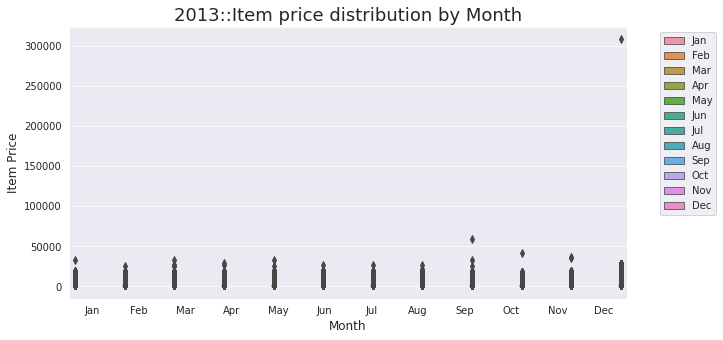

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="item_price", hue="month_short",
            width=0.8,
            data=product_sales_2013)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Item Price", size=12)
plt.xlabel("Month", size=12)
plt.title("2013::Item price distribution by Month", size=18)


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
product_sales_2013["item_price"].describe()



count   1267562.000
mean        726.798
std        1293.872
min           0.000
25%         199.000
50%         399.000
75%         799.000
max      307980.000
Name: item_price, dtype: float64

| item price     | Values| 
| :-- | --: |
|count|   1267562.000|
|mean |       726.798|
|std|        1293.872|
|min|           0.000|
|25%|         199.000|
|50% |        399.000|
|75% |        799.000|
|max|      307980.000|

> Bloque con sangría




##### **<span id="First" style="color:#8A2260;">Item price outliers by month & year: 2014</span>**

Text(0.5, 1.0, '2014::Item price distribution by Month')

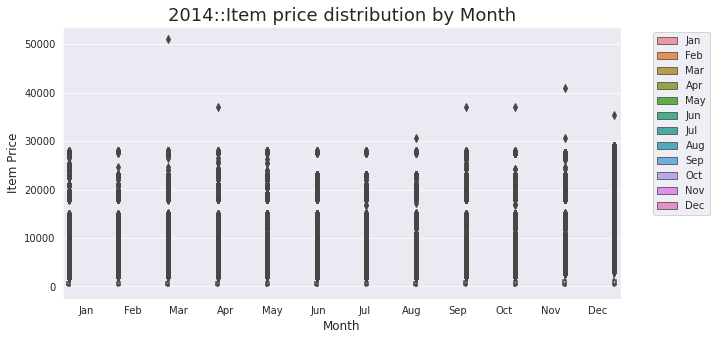

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="item_price", hue="month_short",
            width=0.8,
            data=product_sales_2014)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Item Price", size=12)
plt.xlabel("Month", size=12)
plt.title("2014::Item price distribution by Month", size=18)


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
product_sales_2014["item_price"].describe()


count   1055861.000
mean        988.344
std        1992.133
min           0.500
25%         263.000
50%         449.000
75%         999.000
max       50999.000
Name: item_price, dtype: float64

| Item Price     | Values| 
| :-- | --: |
|count|   1055861.000|
|mean|        988.344|
|std|        1992.133|
|min|           0.500|
|25% |        263.000|
|50%  |       449.000|
|75% |        999.000|
|max|       50999.000|

##### **<span id="First" style="color:#8A2260;">Item price outliers by month & year: 2015</span>**

Text(0.5, 1.0, '2015::Item price distribution by Month')

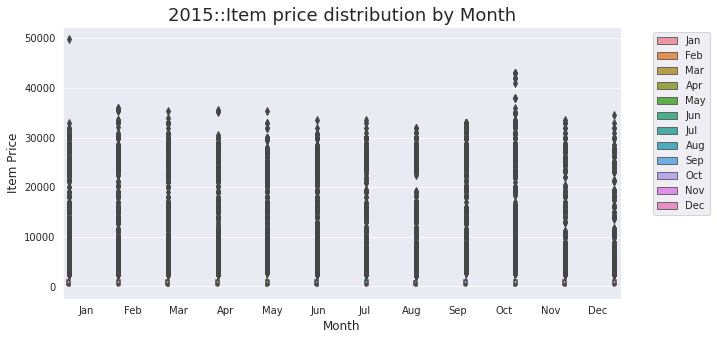

In [ ]:
# make boxplot with Seaborn 2015
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="item_price", hue="month_short",
            width=0.8,
            data=product_sales_2015)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Item Price", size=12)
plt.xlabel("Month", size=12)
plt.title("2015::Item price distribution by Month", size=18)


In [ ]:
product_sales_2015["item_price"].describe()


count   612426.000
mean      1062.325
std       1983.809
min          0.909
25%        299.000
50%        499.000
75%       1199.000
max      49782.000
Name: item_price, dtype: float64

| Item price     | Values| 
| :-- | --: |
|count |  612426.000|
|mean |     1062.325|
|std |      1983.809|
|min |         0.909|
|25% |       299.000|
|50%|        499.000|
|75%|       1199.000|
|max|      49782.000|

##### **<span id="First" style="color:#8A2260;">Items Sold outliers by month & year: 2013</span>**

Text(0.5, 1.0, '2013::Items Sold Day distribution by Month')

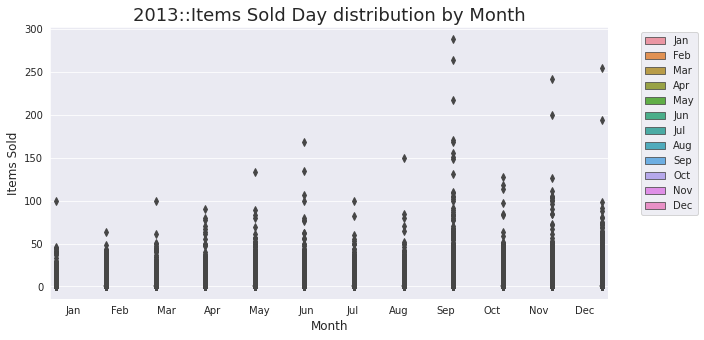

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="item_cnt_day", hue="month_short",
            width=0.8,
            data=product_sales_2013)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Items Sold", size=12)
plt.xlabel("Month", size=12)
plt.title("2013::Items Sold Day distribution by Month", size=18)

In [ ]:
product_sales_2013["item_cnt_day"].describe()

count   1267562.000
mean          1.235
std           1.666
min           0.000
25%           1.000
50%           1.000
75%           1.000
max         288.000
Name: item_cnt_day, dtype: float64

| Items Sold     | Values| 
| :- | -: |
|count |  1267562.000|
|mean |         1.235|
|std |          1.666|
|min  |         0.000|
|25%    |       1.000|
|50%  |         1.000|
|75%   |        1.000|
|max    |     288.000|

##### **<span id="First" style="color:#8A2260;">Items Sold outliers by month & year: 2014</span>**

Text(0.5, 1.0, '2014: Items Sold distribution by Month')

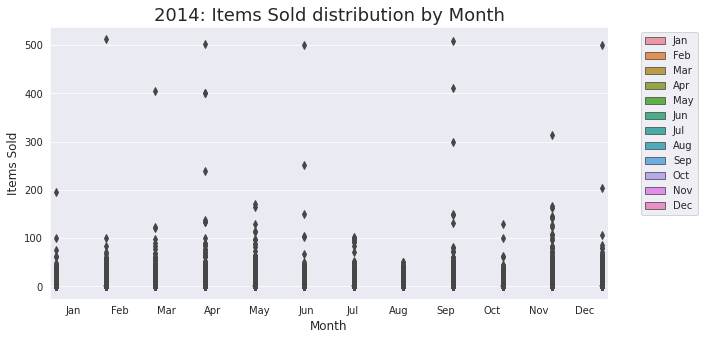

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="item_cnt_day", hue="month_short",
            width=0.8,
            data=product_sales_2014)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Items Sold", size=12)
plt.xlabel("Month", size=12)
plt.title("2014: Items Sold distribution by Month", size=18)

In [ ]:
product_sales_2014["item_cnt_day"].describe()

count   1055861.000
mean          1.254
std           2.257
min           0.000
25%           1.000
50%           1.000
75%           1.000
max         512.000
Name: item_cnt_day, dtype: float64

| Items Sold     | Values| 
| :- | -: |
|count |  1055861.000|
|mean |         1.254|
|std |          2.257|
|min|           0.000|
|25%   |        1.000|
|50%   |        1.000|
|75% |          1.000|
|max  |       512.000|

##### **<span id="First" style="color:#8A2260;">Items Sold outliers by month & year: 2015</span>**

Text(0.5, 1.0, '2015:Items Sold distribution by Month')

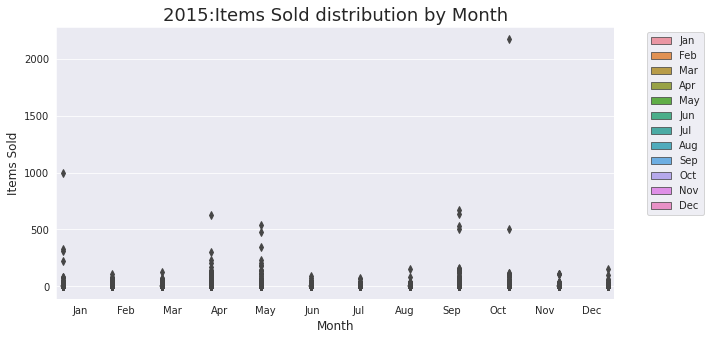

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="item_cnt_day", hue="month_short",
            width=0.8,
            data=product_sales_2015)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Items Sold", size=12)
plt.xlabel("Month", size=12)
plt.title("2015:Items Sold distribution by Month", size=18)

In [ ]:
product_sales_2015["item_cnt_day"].describe()


count   612426.000
mean         1.251
std          4.279
min          0.000
25%          1.000
50%          1.000
75%          1.000
max       2169.000
Name: item_cnt_day, dtype: float64

| Items Sold     | Values| 
| :-|-: |
| count  |  612426.000| 
| mean  |        1.251| 
| std    |       4.279| 
| min    |       0.000| 
| 25%   |        1.000| 
| 50%     |      1.000| 
| 75%      |     1.000| 
| max       | 2169.000| 

##### **<span id="First" style="color:#8A2260;">Revenue outliers by month & year: 2013</span>**

Text(0.5, 1.0, '2013:: Revenue distribution by Month')

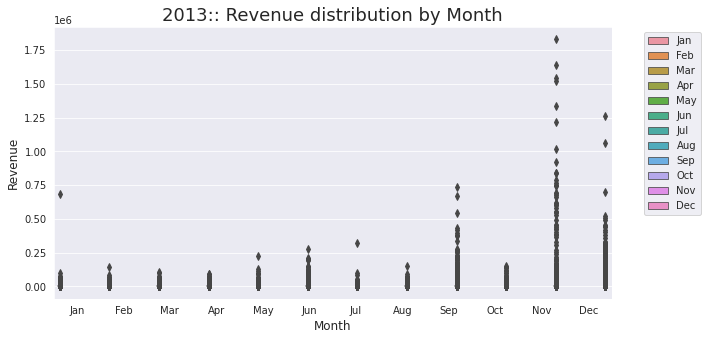

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="revenue", hue="month_short",
            width=0.8,
            data=product_sales_2013)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Revenue", size=12)
plt.xlabel("Month", size=12)
plt.title("2013:: Revenue distribution by Month", size=18)

In [ ]:
product_sales_2013["revenue"].describe()


count   1267562.000
mean        963.380
std        6094.456
min           0.000
25%         207.700
50%         399.000
75%         899.000
max     1829990.000
Name: revenue, dtype: float64

| Revenue      |  Values| 
| :- | -: |
|count  | 1267562.000|
|mean  |      963.380|
|std  |      6094.456|
|min  |         0.000|
|25%|207.700|
|50% |        399.000|
|75% |        899.000|
|max|     1829990.000|

##### **<span id="First" style="color:#8A2260;">Revenue outliers by month & year: 2014</span>**

Text(0.5, 1.0, '2014::Revenue distribution by Month')

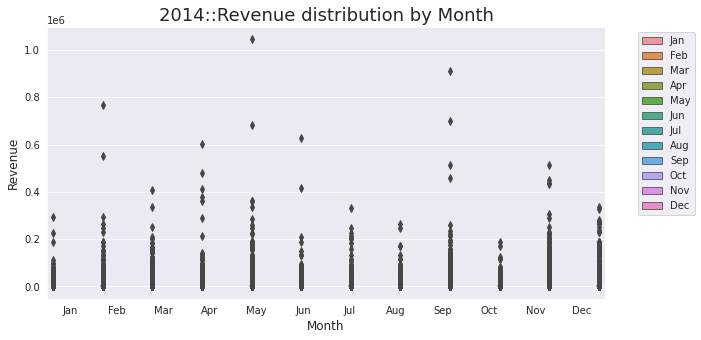

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="revenue", hue="month_short",
            width=0.8,
            data=product_sales_2014)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Revenue", size=12)
plt.xlabel("Month", size=12)
plt.title("2014::Revenue distribution by Month", size=18)

In [ ]:
product_sales_2014["revenue"].describe()


count   1055861.000
mean       1279.549
std        4859.966
min           0.000
25%         298.900
50%         499.000
75%        1198.000
max     1044450.000
Name: revenue, dtype: float64

| Revenue     |  Values| 
|:- | -: |
|count |  1055861.000|
|mean  |     1279.549|
|std  |      4859.966|
|min  |         0.000|
|25%  |       298.900|
|50%  |       499.000|
|75% |       1198.000|
|max  |   1044450.000|

##### **<span id="First" style="color:#8A2260;">Revenue outliers by month & year: 2015</span>**

Text(0.5, 1.0, '2015::Revenue distribution by Month')

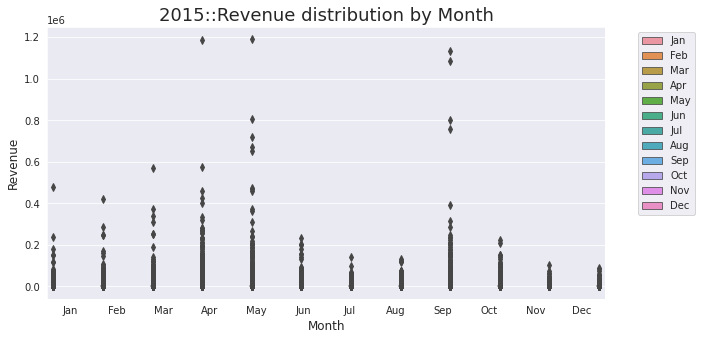

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(x="month_short", y="revenue", hue="month_short",
            width=0.8,
            data=product_sales_2015)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Revenue", size=12)
plt.xlabel("Month", size=12)
plt.title("2015::Revenue distribution by Month", size=18)

In [ ]:
product_sales_2015["revenue"].describe()


count    612426.000
mean       1367.818
std        6079.585
min           0.000
25%         299.000
50%         549.000
75%        1299.000
max     1189860.000
Name: revenue, dtype: float64

| Revenue     | Values| 
| :- | -: |
|count  |  612426.000|
|mean   |    1367.818|
|std    |    6079.585|
|min    |       0.000|
|25%    |     299.000|
|50%     |    549.000|
|75%     |   1299.000|
|max    | 1189860.000|

##### **<span id="First" style="color:#8A2260;">Correlation between variables</span>**

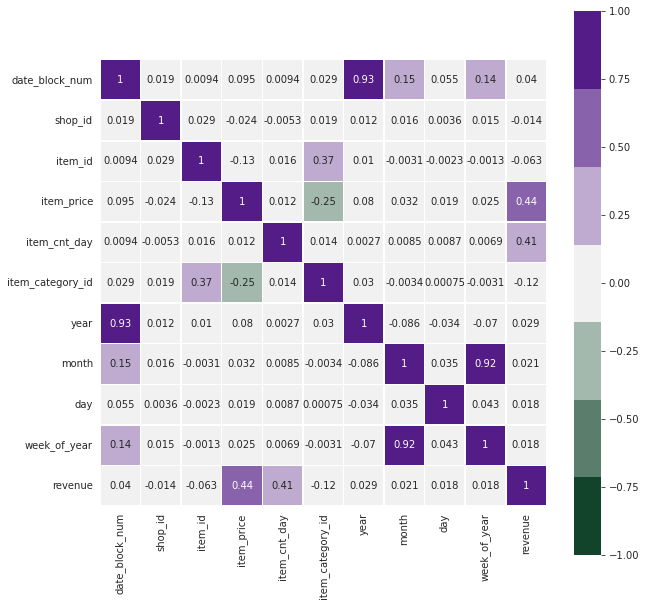

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(product_sales.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            annot= True,
            linewidths=.5);

#### **<span id="First" style="color:#8A2260;">2.3 Understanding articles & categories</span>**

##### **<span id="First" style="color:#8A2260;">2.3.1 Count of articles by category: general overview</span>**

- Cinema - DVD are the categories that have the most available catalog as a whole. \
- Furthermore, "PC Games - Standard editions" and "PC Games Additional Editions" are second and third place respectively. \
- We also see an interesting volume in the case of PS3 and Xbox Games. \
- During 2013, the product catalog was more extensive than in 2014 and 2015, where items were probably removed from it.

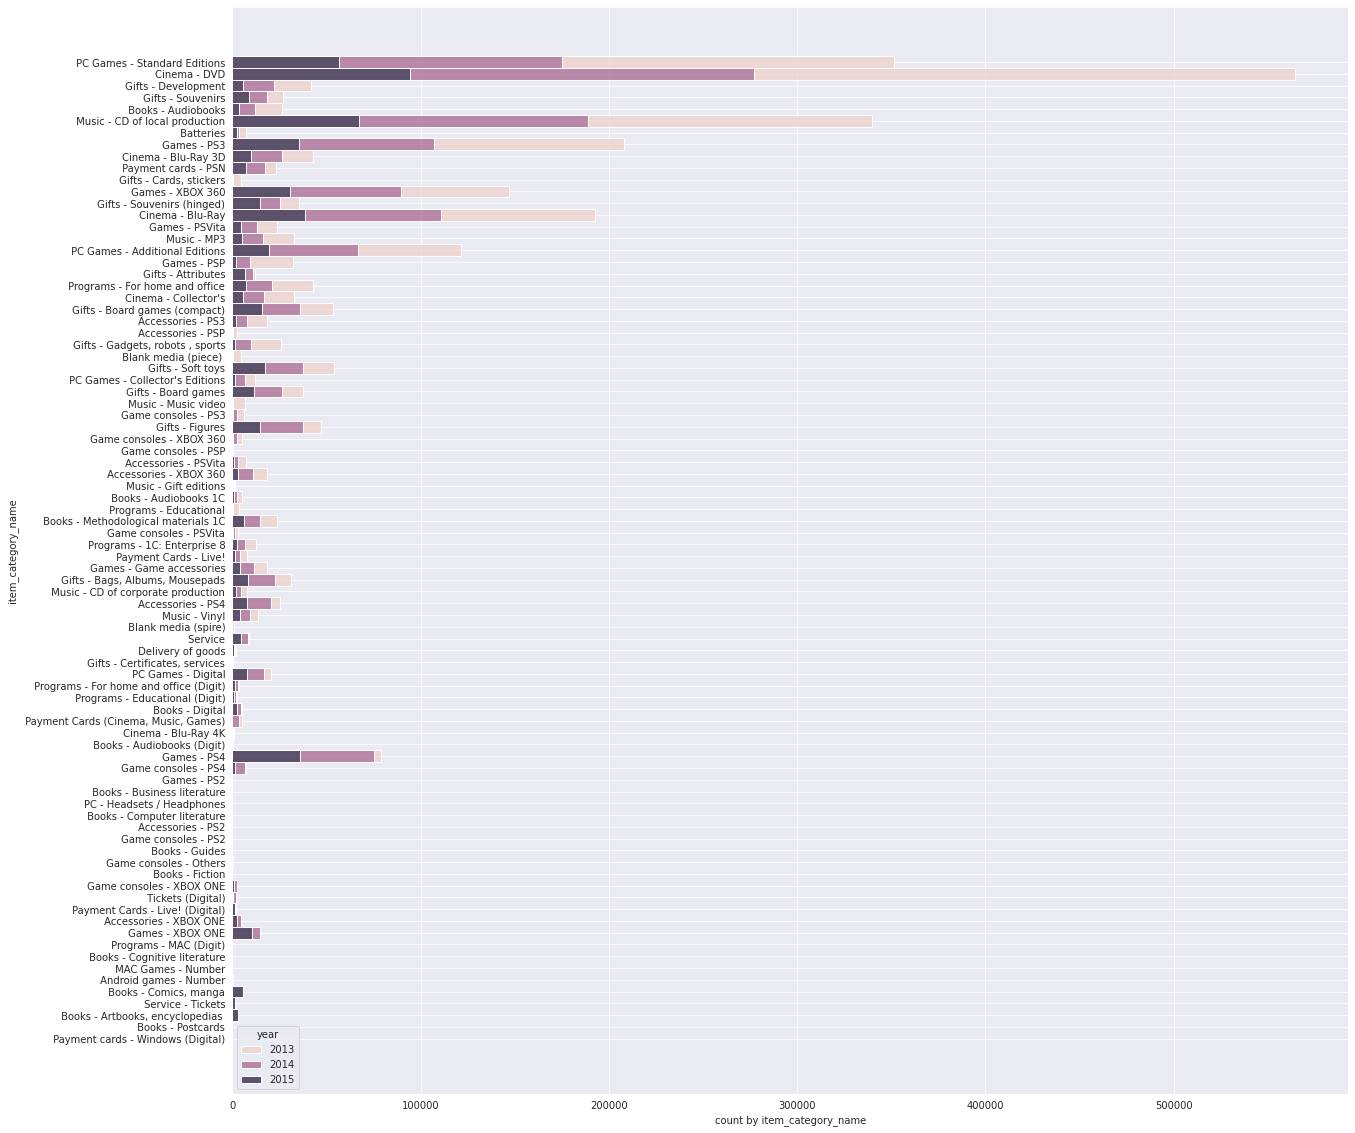

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_style("darkgrid")
ax = sns.histplot(data=product_sales, y='item_category_name', color='viridis', hue="year", multiple="stack")
ax.set_xlabel('count by item_category_name')
ax.set_ylabel('item_category_name')
plt.show()

#### **<span id="First" style="color:#8A2260;">2.3.2 Count of articles by category: 2013</span>**

- In 2013, observing the split, we see how the month-to-month stock remains stable, since the portions of items in the catalog do not vary excessively.

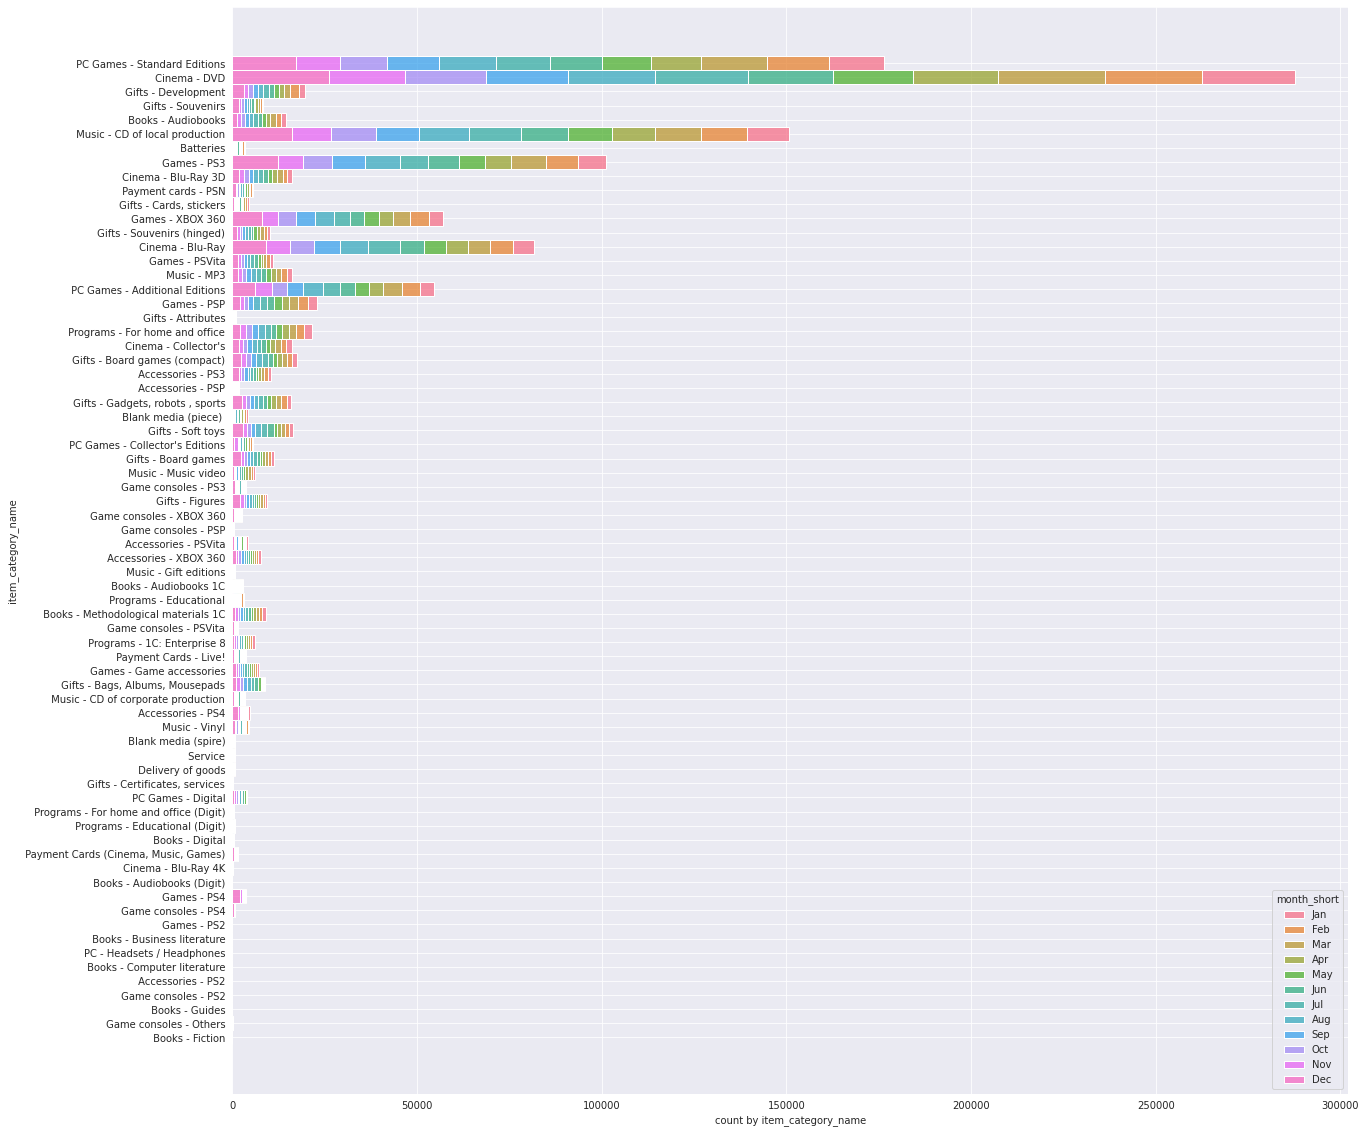

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_style("darkgrid")
ax = sns.histplot(data=product_sales_2013, y='item_category_name', color='viridis', hue="month_short", multiple="stack")
ax.set_xlabel('count by item_category_name')
ax.set_ylabel('item_category_name')
plt.show()

#### **<span id="First" style="color:#8A2260;">2.3.2 Count of articles by category: 2014</span>**

- In 2014, the stock of products does not vary from month to month, maintaining a stable volume.

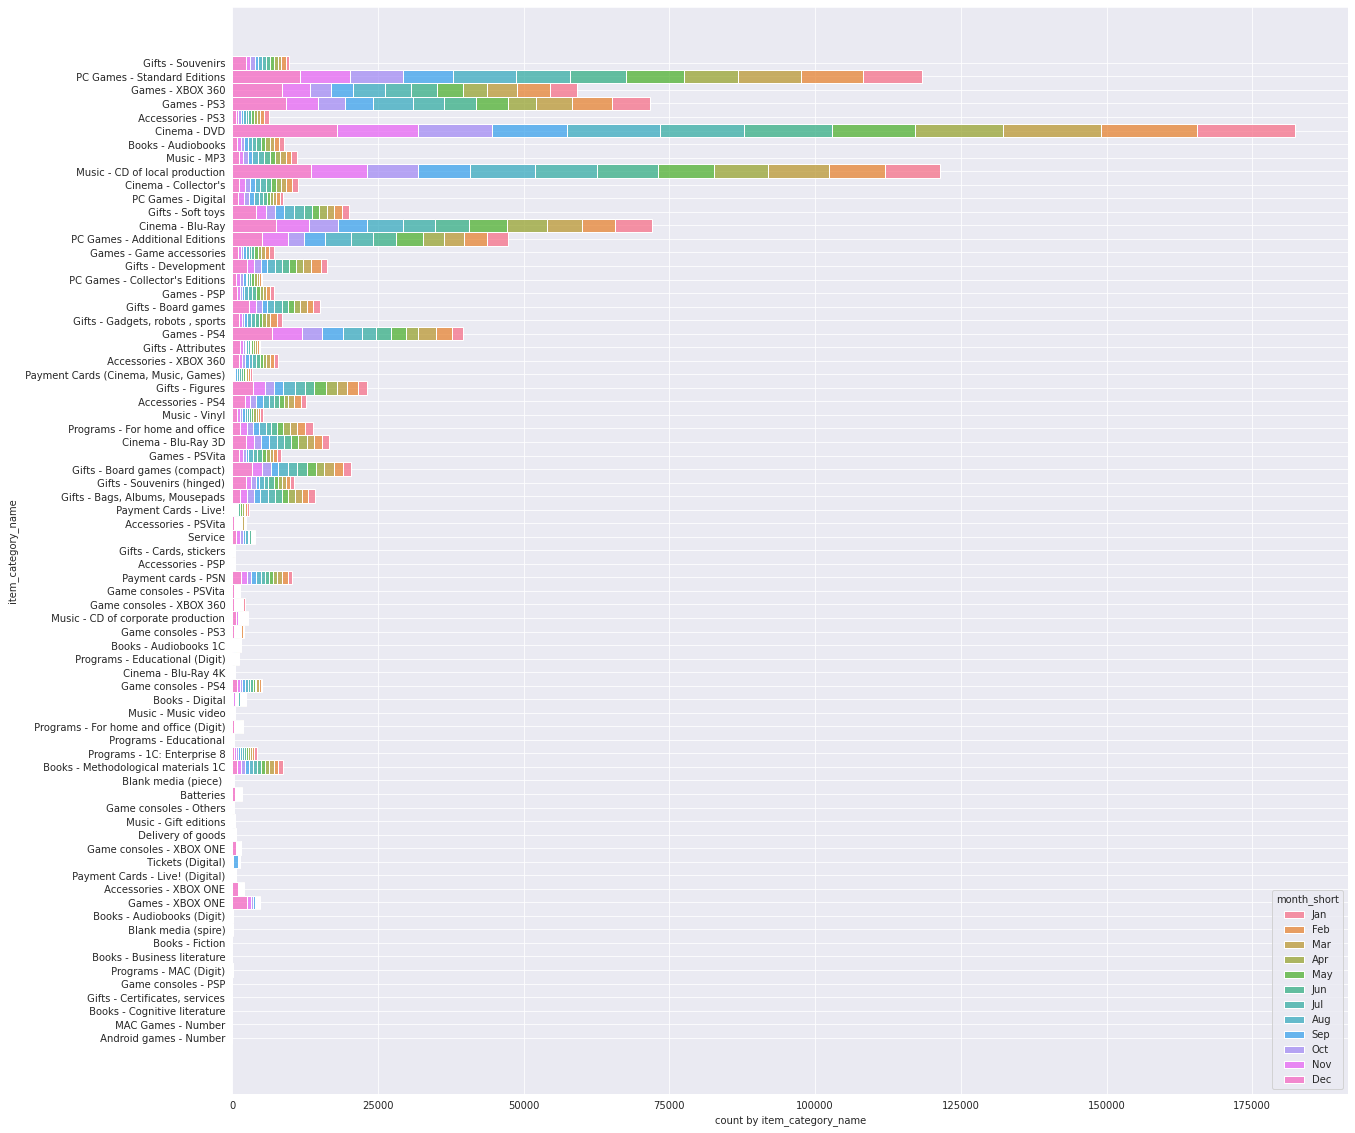

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_style("darkgrid")
ax = sns.histplot(data=product_sales_2014, y='item_category_name', color='viridis', hue="month_short", multiple="stack")
ax.set_xlabel('count by item_category_name')
ax.set_ylabel('item_category_name')
plt.show()

#### **<span id="First" style="color:#8A2260;">2.3.2 Count of articles by category: 2015</span>**

- The set of available products is stable. We only observed a small difference in January and April, in the "Cinema DVD" category, where the stock has decreased considerably compared to the rest of the months for this category during 2015.

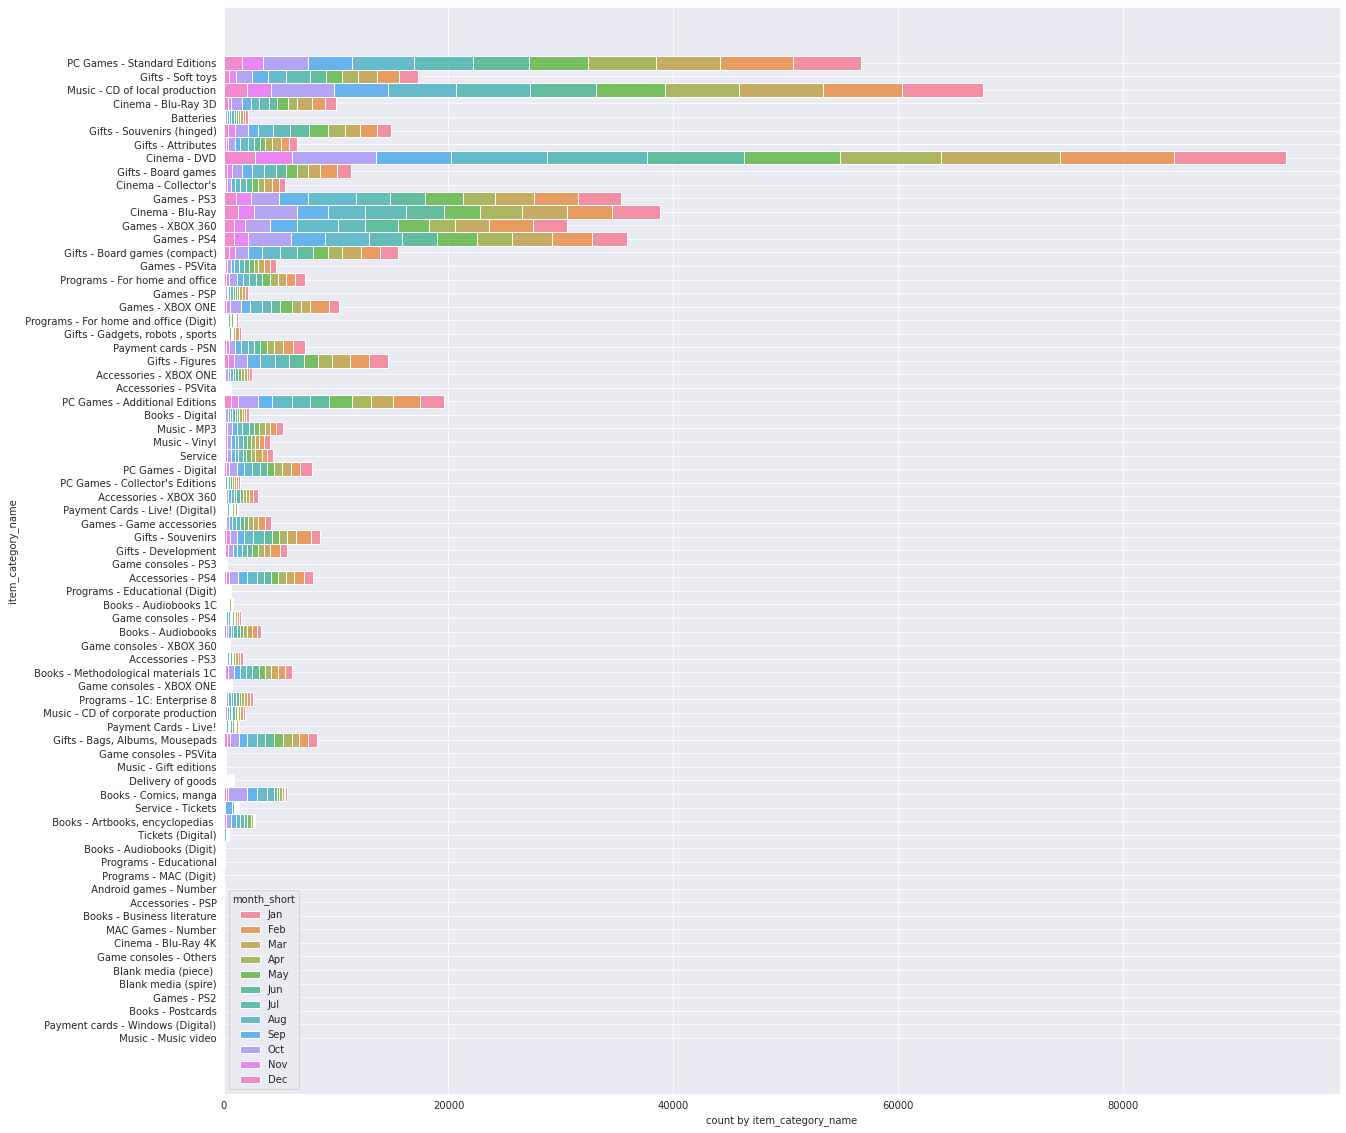

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_style("darkgrid")
ax = sns.histplot(data=product_sales_2015, y='item_category_name', color='viridis', hue="month_short", multiple="stack")
ax.set_xlabel('count by item_category_name')
ax.set_ylabel('item_category_name')
plt.show()

#### **<span id="First" style="color:#8A2260;">2.4 Temporary Patterns</span>**

#### **<span id="First" style="color:#8A2260;">2.4.1 Items sold across the years: General behaviour</span>**

- At a glance, the items sold over time are between 1 and 3.
- There are notable peaks of activity, where more units are sold, especially throughout the year 2015 (April, May, September and December)

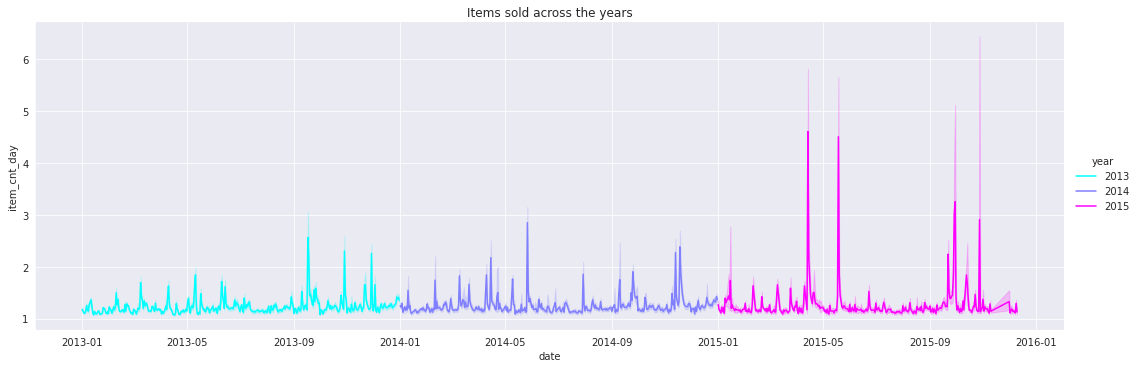

In [ ]:
sns.set_style("darkgrid")
sns.relplot (
    data=product_sales,
    x="date", y="item_cnt_day", hue="year",
    kind="line", height=5, aspect=3,
    palette= "cool"
).set(title = "Items sold across the years")

#### **<span id="First" style="color:#8A2260;">Items sold behaviour year deep dive </span>**

- September as the strongest month of the three years analysed. For its part, we also observed a growth in sales between March and May, between 2014 and 2015.
- The summer period indicates seasonality in this type of product between June and August.
- 2013, although the year where fewer products are sold, the behavior curve indicates a smaller number of campaigns, the falls are not as abrupt and the growth periods are more stable, without as many peaks and valleys as in the other two years.

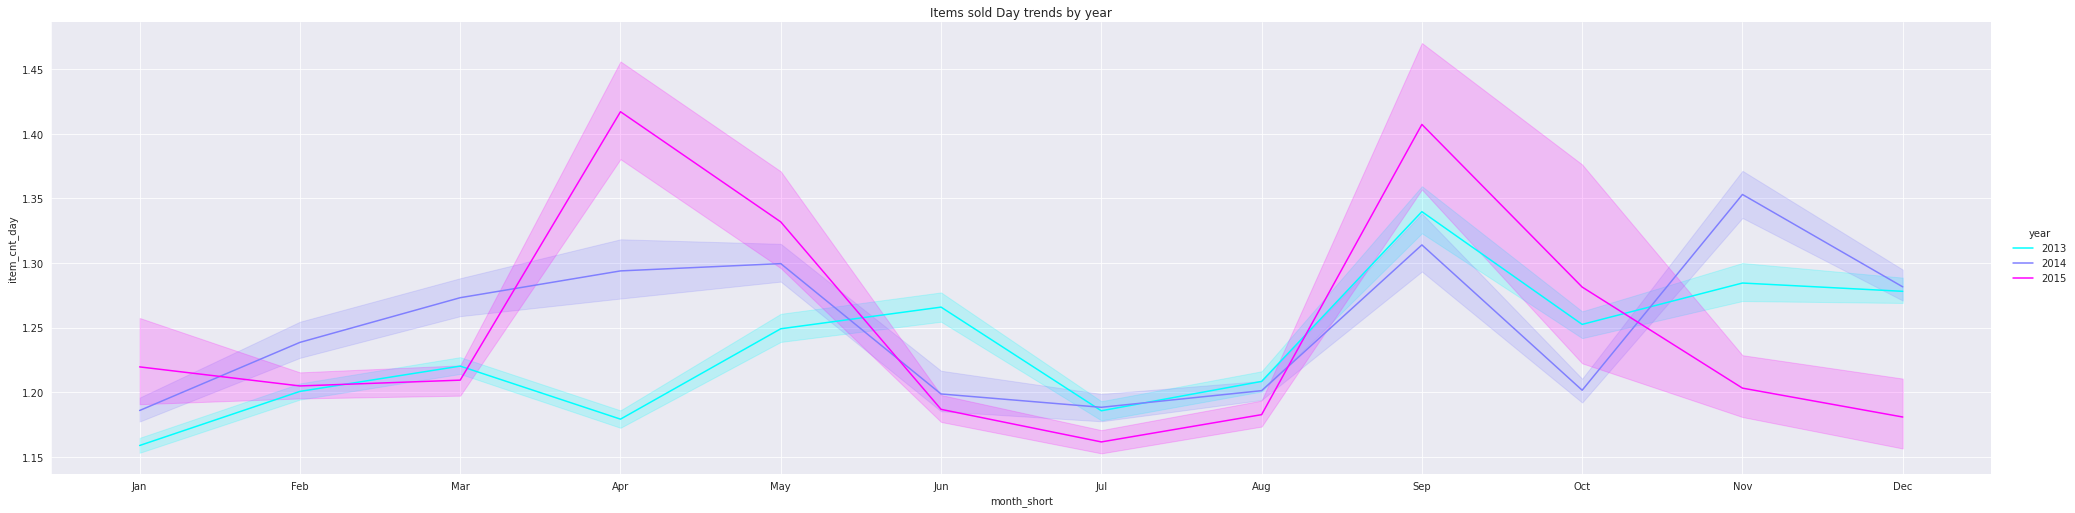

In [ ]:
sns.set_style("darkgrid")
sns.relplot(
    data=product_sales, 
    x="month_short", y="item_cnt_day", hue="year", 
    height=7, aspect=4, 
    kind="line",
    palette= "cool"
).set(title = "Items sold Day trends by year")


#### **<span id="First" style="color:#8A2260;">2.4.2 Items price across the years: General </span>**

<Figure size 1440x360 with 0 Axes>

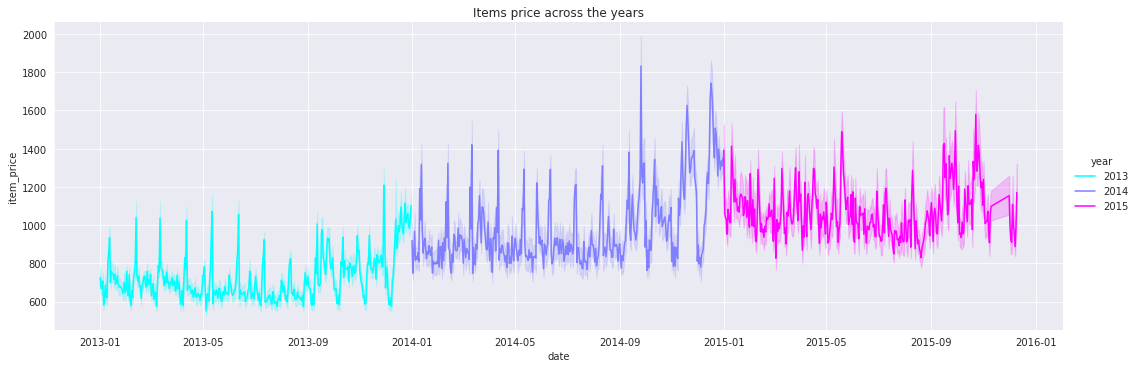

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
sns.relplot (
    data=product_sales,
    x="date", y="item_price", hue="year",
    kind="line", height=5, aspect=3,
    palette= "cool"
).set(title = "Items price across the years")

#### **<span id="First" style="color:#8A2260;">Items price behaviour year deep dive </span>**

- The price trend has been on the rise since 2013, possibly a rise in price, making them more specific and expensive products.
- In 2014, the trend stabilized, although as of August they began to grow again in order to maintain normal behavior in 2015.
- We see how from August in the three years there is an increase in prices, which could explain the low sales or an attempt to maintain profits, making products more expensive due to low demand.

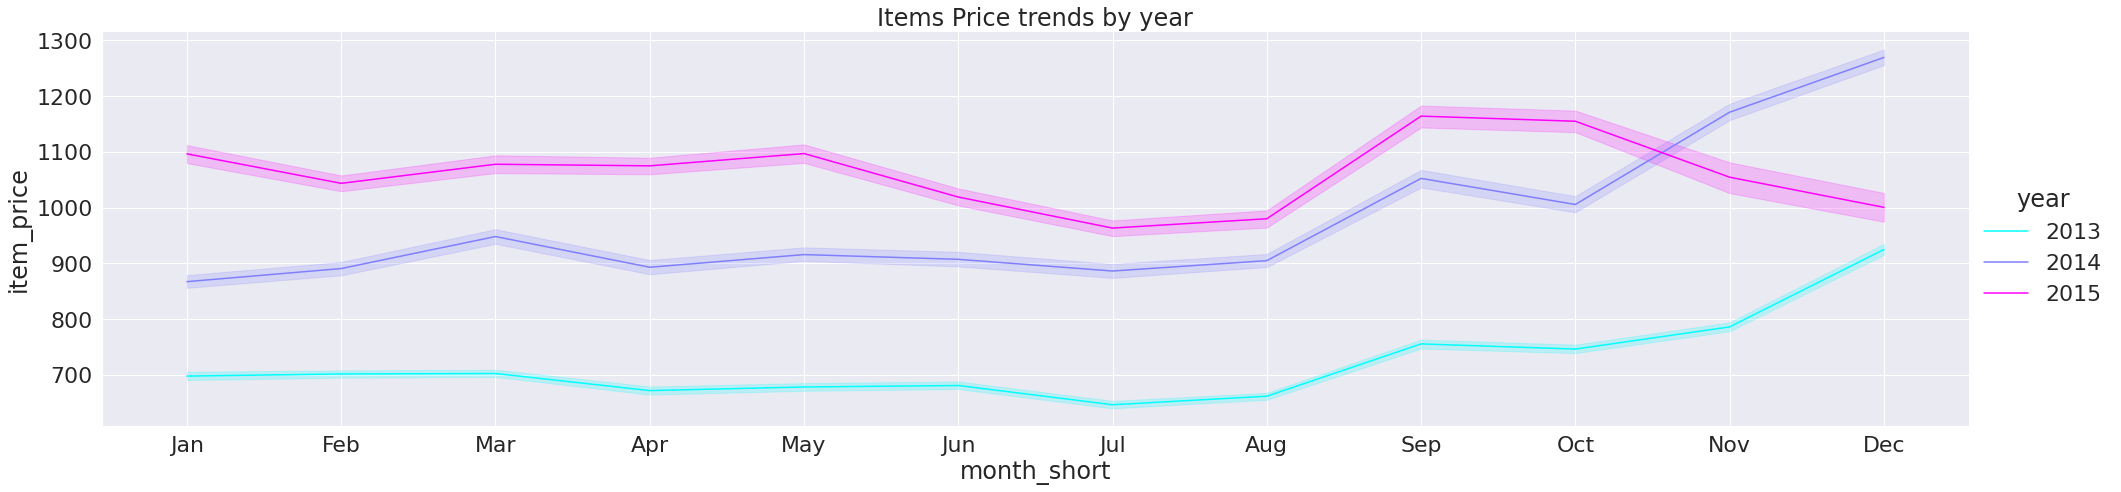

In [ ]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
sns.relplot(
    data=product_sales, 
    x="month_short", y="item_price", hue="year", 
    height=7, aspect=4, 
    kind="line",
    palette= "cool"
).set(title = "Items Price trends by year")


#### **<span id="First" style="color:#8A2260;">2.4.3 Revenue across the years: General </span>**

<Figure size 1440x360 with 0 Axes>

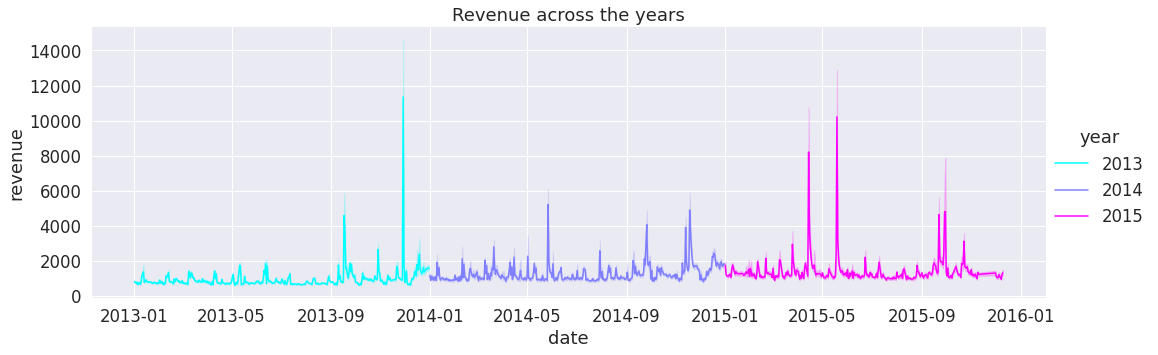

In [ ]:
sns.set_style("darkgrid")
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(20,5))
sns.relplot (
    data=product_sales,
    x="date", y="revenue", hue="year",
    kind="line", height=5, aspect=3,
    palette= "cool"
).set(title = "Revenue across the years")

#### **<span id="First" style="color:#8A2260;">Revenue behaviour year deep dive </span>**

- The increase in prices causes revenues to decrease due to low sales, especially in the summer periods

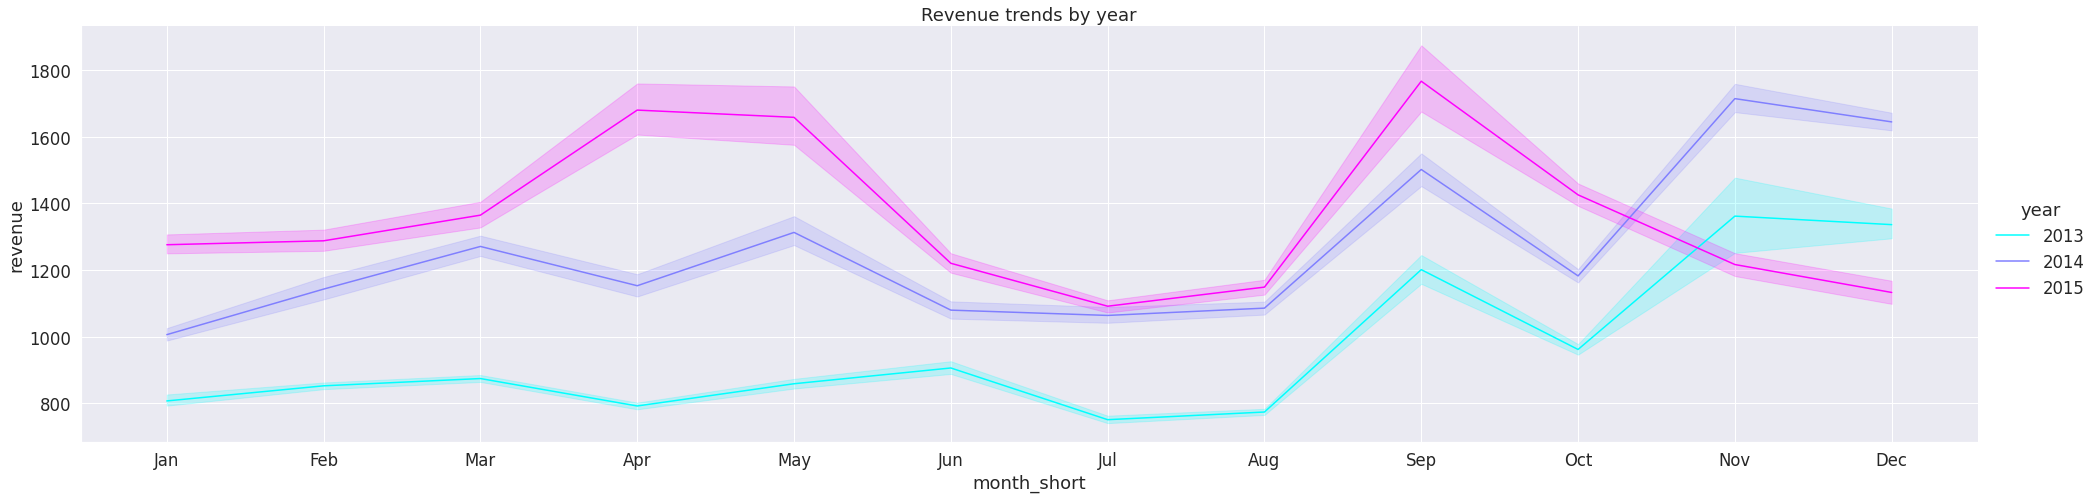

In [ ]:
sns.set_style("darkgrid")
sns.relplot(
    data=product_sales, 
    x="month_short", y="revenue", hue="year", 
    height=7, aspect=4, 
    kind="line",
    palette= "cool"
).set(title = "Revenue trends by year")


#### **<span id="First" style="color:#8A2260;">2.5 Shop ID behaviour</span>**

#### **<span id="First" style="color:#8A2260;">2.5.1 2013 Shop ID revenue by month</span>**

In [ ]:
#We create a pivot table based on month and store ID
heatmap_data_2013 = pd.pivot_table(product_sales_2013, values="revenue", index=["shop_id"], columns="month")
print(heatmap_data_2013)

month         1        2        3        4        5        6        7   \
shop_id                                                                  
0        584.664  727.464  580.385  763.048  787.668  639.959  735.063   
1        536.100  568.859  516.647 1007.110  568.042  719.361  559.535   
2       1219.316 1270.773 1225.565 1132.110 1231.498 1302.578 1156.915   
3        768.486  788.295  810.324  672.304  813.698  801.136  927.988   
4        780.949  888.394  835.911  916.629  818.603  961.882  860.476   
5        788.562  672.790  724.144  603.426  672.829  703.982  650.328   
6        790.079  876.225  963.469  778.888  904.880  978.091  791.597   
7        819.091  852.088  874.752  784.148  841.990  801.121  778.010   
8        694.137  728.127  645.736  745.060  737.038  625.956  641.198   
9            NaN      NaN 2267.122 3772.335 4276.967 4605.715      NaN   
10       616.679  691.627  748.989  697.439  644.431  703.153  595.787   
12      1453.418 1658.503 2353.392 148

Text(0.5, 1.0, '2013::revenue by shop ID & Month')

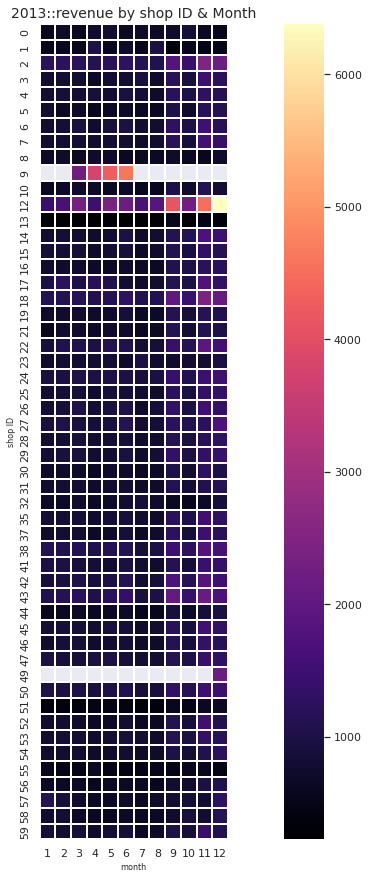

In [ ]:
#Heatmap
plt.figure(figsize=(20,15))
sns.set(font_scale = 1)
sns.heatmap(heatmap_data_2013,cmap="magma", linewidth=1,linecolor="w",square=True)
plt.xlabel("month", size=8)
plt.ylabel("shop ID", size=8)
plt.title("2013::revenue by shop ID & Month", size=14)

#### **<span id="First" style="color:#8A2260;">2.5.2 2014 Shop ID revenue by month</span>**

In [ ]:
heatmap_data_2014 = pd.pivot_table(product_sales_2014, values="revenue", index=["shop_id"], columns="month")
print(heatmap_data_2014)

month         1        2        3        4        5        6        7   \
shop_id                                                                  
2       1368.536 1730.723 2161.090 1562.145 1980.015 1590.708 1663.182   
3       1082.071 1203.088 1185.066 1095.324 1437.872 1027.501 1133.762   
4       1075.550 1000.963 1234.751 1041.181 1239.488 1177.555 1049.826   
5        827.087  953.361 1316.085 1138.683 1102.355 1063.726  955.806   
6       1073.961 1079.102 1309.358 1131.671 1344.195 1097.740 1160.534   
7       1090.194 1061.902 1208.619 1090.840 1138.901 1049.676 1165.852   
9            NaN 2726.762 4716.062 5084.925 5363.000      NaN      NaN   
10       898.454  812.505 1102.272  969.776 1276.566  994.525  937.742   
12      2567.581 5197.243 4217.772 3031.720 5141.264 2067.831 1948.654   
13       310.851  421.573  401.123  435.393  400.488  358.269  367.164   
14      1131.005 1507.101 1584.234 1470.976 1564.777 1189.214 1413.737   
15      1019.814  968.531 1137.383 115

Text(0.5, 1.0, '2014::revenue by shop ID & Month')

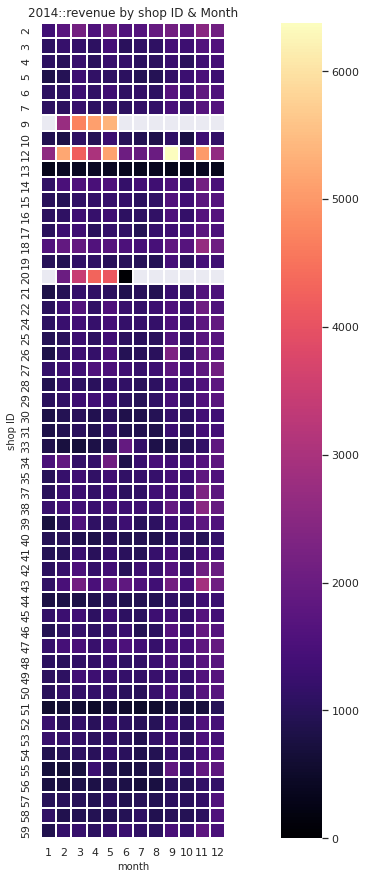

In [ ]:
#Heatmap
plt.figure(figsize=(20,15))
sns.set(font_scale = 1)
sns.heatmap(heatmap_data_2014,cmap="magma", linewidth=1,linecolor="w",square=True)
plt.xlabel("month", size=10)
plt.ylabel("shop ID", size=10)
plt.title("2014::revenue by shop ID & Month", size=12)

#### **<span id="First" style="color:#8A2260;">2.5.3 2015 Shop ID revenue by month</span>**

In [ ]:
heatmap_data_2015 = pd.pivot_table(product_sales_2015, values="revenue", index=["shop_id"], columns="month")
print(heatmap_data_2015)

month         1        2        3        4        5        6        7   \
shop_id                                                                  
2       1574.486 1435.556 1699.848 2231.081 2336.583 1433.550 1412.023   
3       1291.689 1353.766 1501.254 1489.951 1724.518 1115.709 1305.430   
4       1116.604 1185.448 1173.909 1230.038 1460.299 1052.532  842.899   
5       1116.803 1022.967  943.211 1234.700 1205.565  944.086 1014.138   
6       1107.431 1371.273 1283.407 1862.959 2114.529 1250.726 1037.617   
7       1379.456 1261.686 1215.300 1588.982 1475.502 1189.207 1144.467   
9       2709.362 4673.317 5546.908 4710.730      NaN      NaN      NaN   
10       791.132  752.150 1042.125 1320.128 1232.958  782.919  941.576   
11      1391.143  855.215 1417.850 2929.303  388.817  611.133 1203.156   
12      2683.622 2464.515 3303.212 5300.238 6953.162 1938.614 1544.438   
14      1222.969 1450.524 1449.910 1992.607 2160.244 1330.059 1138.546   
15      1401.117 1407.268 1359.949 170

Text(0.5, 1.0, '2015::revenue by shop ID & Month')

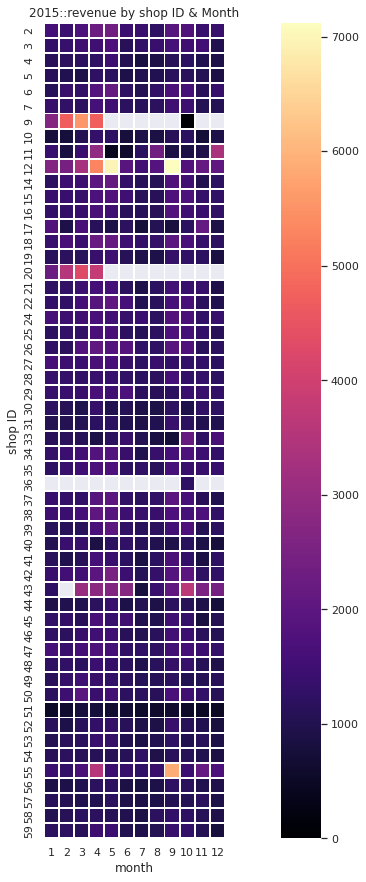

In [ ]:
#Heatmap
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
sns.heatmap(heatmap_data_2015,cmap="magma", linewidth=1,linecolor="w",square=True)
plt.xlabel("month", size=12)
plt.ylabel("shop ID", size=12)
plt.title("2015::revenue by shop ID & Month", size=12)

#### **<span id="First" style="color:#8A2260;">2.5.4 2013 Shop ID Items sold by month</span>**

In [ ]:
#Create the pivot table
items_sold_data_2013 = pd.pivot_table(product_sales_2013, values="item_cnt_day", index=["shop_id"], columns="month")
print(items_sold_data_2013)

month      1     2     3     4     5     6     7     8     9     10    11  \
shop_id                                                                     
0       1.145 1.215 1.192 1.258 1.189 1.178 1.127 1.242 1.211 1.212 1.180   
1       1.089 1.135 1.084 1.088 1.142 1.113 1.012 1.187 1.110 1.150 1.038   
2       1.077 1.107 1.138 1.092 1.100 1.150 1.069 1.091 1.256 1.171 1.239   
3       1.043 1.073 1.073 1.044 1.079 1.112 1.090 1.085 1.223 1.086 1.141   
4       1.097 1.122 1.135 1.117 1.138 1.126 1.109 1.115 1.226 1.166 1.177   
5       1.104 1.066 1.085 1.058 1.090 1.106 1.086 1.064 1.138 1.094 1.109   
6       1.136 1.212 1.261 1.143 1.241 1.267 1.177 1.188 1.329 1.274 1.298   
7       1.084 1.144 1.151 1.070 1.131 1.125 1.130 1.110 1.258 1.156 1.199   
8       1.056 1.054 1.053 1.037 1.069 1.035 1.026 1.078 1.128 1.035 1.000   
9         NaN   NaN 2.371 4.184 4.662 5.365   NaN   NaN   NaN   NaN   NaN   
10      1.095 1.107 1.153 1.088 1.160 1.146 1.099 1.123 1.267 1.188 1.167   

Text(0.5, 1.0, '2013::items sold by shop ID & Month')

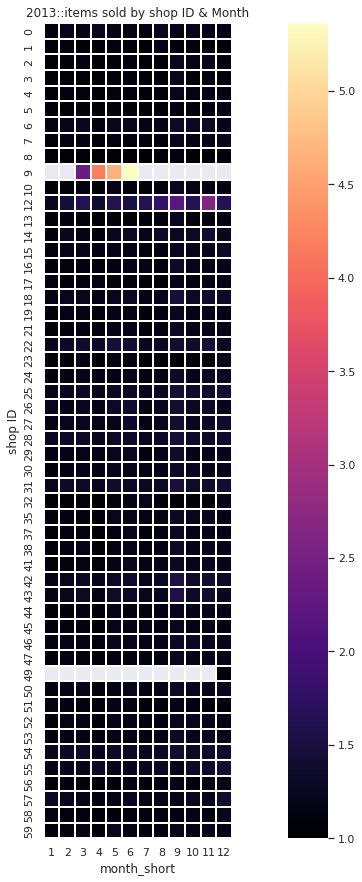

In [ ]:
#Creamos el heatmap
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
sns.heatmap(items_sold_data_2013,cmap="magma", linewidth=1,linecolor="w",square=True)
plt.xlabel("month_short", size=12)
plt.ylabel("shop ID", size=12)
plt.title("2013::items sold by shop ID & Month", size=12)

#### **<span id="First" style="color:#8A2260;">2.5.5 2014 Shop ID Items sold by month</span>**

In [ ]:
#Creamos los datos de revenue en una pivot table a nivel de mes y de tienda
items_sold_data_2014 = pd.pivot_table(product_sales_2014, values="item_cnt_day", index=["shop_id"], columns="month")
print(items_sold_data_2014)

month      1     2     3     4     5     6     7     8     9     10    11  \
shop_id                                                                     
2       1.065 1.139 1.225 1.160 1.304 1.175 1.163 1.251 1.279 1.189 1.381   
3       1.064 1.126 1.296 1.086 1.168 1.089 1.070 1.124 1.190 1.116 1.161   
4       1.101 1.205 1.148 1.201 1.223 1.202 1.113 1.127 1.141 1.127 1.216   
5       1.158 1.117 1.106 1.121 1.162 1.101 1.111 1.109 1.152 1.126 1.234   
6       1.147 1.209 1.254 1.334 1.287 1.150 1.170 1.144 1.289 1.198 1.353   
7       1.108 1.177 1.159 1.167 1.184 1.139 1.126 1.136 1.182 1.139 1.238   
9         NaN 2.221 4.608 4.702 4.989   NaN   NaN   NaN   NaN   NaN   NaN   
10      1.130 1.123 1.158 1.204 1.233 1.142 1.102 1.112 1.191 1.063 1.226   
12      1.763 2.523 2.193 1.903 2.508 1.392 1.684 1.540 3.312 1.565 3.155   
13      1.099 1.098 1.117 1.105 1.202 1.097 1.075 1.100 1.089 1.073 1.099   
14      1.303 1.337 1.252 1.325 1.460 1.316 1.280 1.274 1.256 1.133 1.447   

Text(0.5, 1.0, '2014::items sold by shop ID & Month')

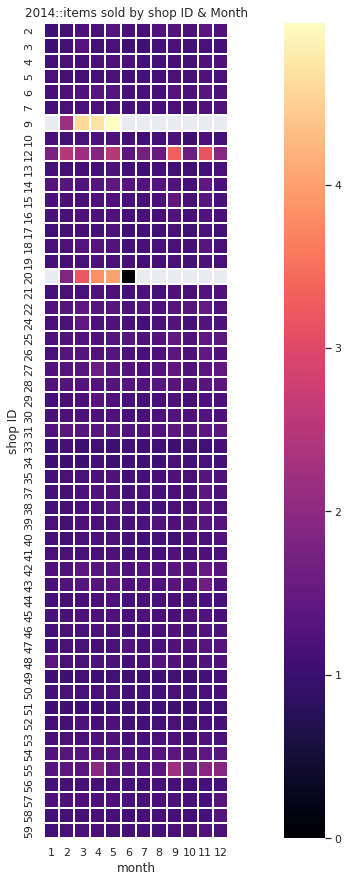

In [ ]:
#Creamos el heatmap
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
sns.heatmap(items_sold_data_2014,cmap="magma", linewidth=1,linecolor="w",square=True)
plt.xlabel("month", size=12)
plt.ylabel("shop ID", size=12)
plt.title("2014::items sold by shop ID & Month", size=12)

#### **<span id="First" style="color:#8A2260;">2.5.6 2015 Shop ID Items sold by month</span>**

In [ ]:
#Creamos los datos de revenue en una pivot table a nivel de mes y de tienda
items_sold_data_2015 = pd.pivot_table(product_sales_2015, values="item_cnt_day", index=["shop_id"], columns="month")
print(items_sold_data_2015)

month      1     2     3     4     5     6     7     8     9     10    11  \
shop_id                                                                     
2       1.110 1.210 1.193 1.394 1.327 1.092 1.104 1.132 1.152 1.170 1.108   
3       1.039 1.092 1.069 1.221 1.131 1.072 1.082 1.095 1.303 1.133 1.064   
4       1.101 1.153 1.124 1.254 1.216 1.089 1.100 1.126 1.161 1.131 1.124   
5       1.081 1.097 1.073 1.311 1.150 1.085 1.103 1.094 1.174 1.086 1.104   
6       1.113 1.156 1.158 1.378 1.339 1.116 1.119 1.109 1.186 1.177 1.115   
7       1.107 1.155 1.115 1.225 1.202 1.105 1.114 1.104 1.165 1.143 1.111   
9       2.208 4.203 4.336 3.681   NaN   NaN   NaN   NaN   NaN 0.000   NaN   
10      1.126 1.046 1.072 1.295 1.303 1.124 1.101 1.066 1.168 1.099 1.059   
11      1.143 1.156 1.000 1.000 1.000 1.000 1.278 1.000 1.091 1.100 1.286   
12      2.288 1.555 1.903 3.042 4.456 1.694 1.398 1.383 4.508 4.053 1.599   
14      1.139 1.179 1.142 1.642 1.402 1.236 1.124 1.142 1.231 1.168 1.137   

Text(0.5, 1.0, '2015::items sold by shop ID & Month')

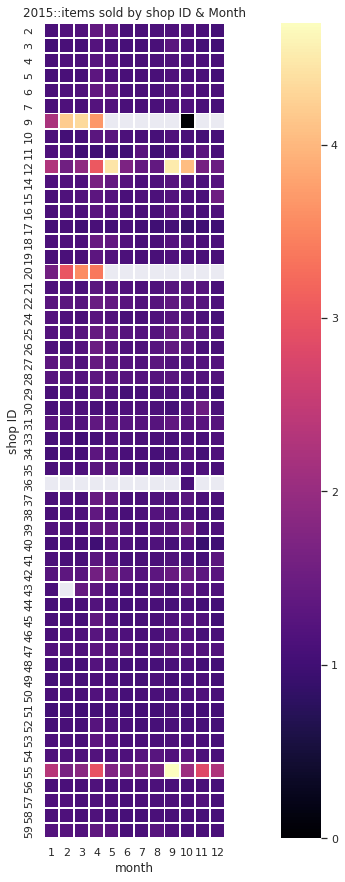

In [ ]:
#Creamos el heatmap
plt.figure(figsize=(20,15))
sns.set(font_scale=1)
sns.heatmap(items_sold_data_2015,cmap="magma", linewidth=1,linecolor="w",square=True)
plt.xlabel("month", size=12)
plt.ylabel("shop ID", size=12)
plt.title("2015::items sold by shop ID & Month", size=12)

# **¿Qué dia de la semana ha generado mayores beneficios?**

In [ ]:
max_revenue_day  = product_sales.groupby("weekday_name").revenue.max()
print(max_revenue_day)

weekday_name
Friday      1829990.000
Monday      1062440.000
Saturday     681630.000
Sunday       503820.000
Thursday    1262480.000
Tuesday     1189860.000
Wednesday   1132300.000
Name: revenue, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


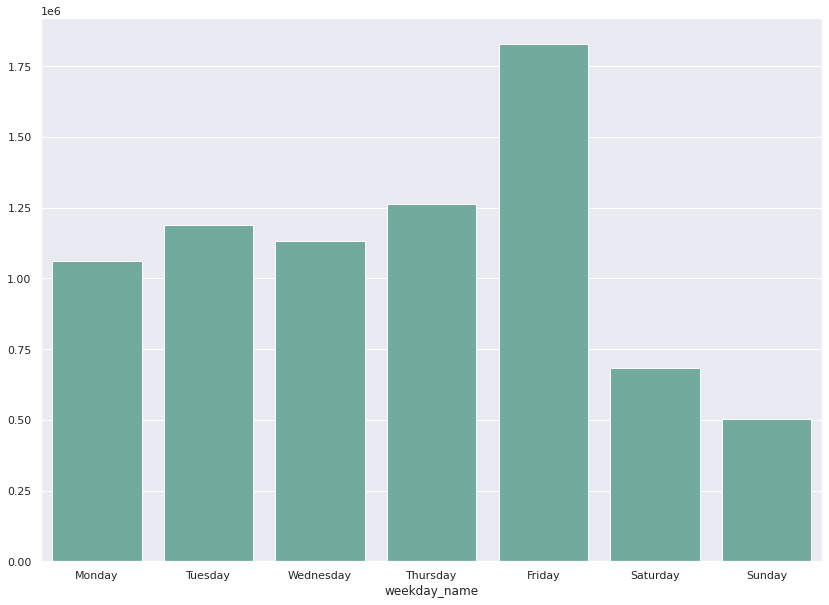

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 10))


# plot a bar chart
sns.barplot(
    #y="max_revenue_day", 
    #x="weekday_name", 
    max_revenue_day.index,max_revenue_day.values,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

In [ ]:
max_revenue_day.sort_values(ascending=False)

weekday_name
Friday      1829990.000
Thursday    1262480.000
Tuesday     1189860.000
Wednesday   1132300.000
Monday      1062440.000
Saturday     681630.000
Sunday       503820.000
Name: revenue, dtype: float64

| Day of the Week    | Revenue| 
| ----------- | ----------- |
|Friday |     1.829.990|
|Thursday |   1.262.480|
|Tuesday|     1.189.860|
|Wednesday|   1.132.300|
|Monday |     1.062.440|
|Saturday  |   681.630|
|Sunday |      503.820|

**¿Qué top 10 de productos venden más de media En general?¿Y por año?**







##General

In [ ]:
mean_products_item_sold_general  = product_sales.groupby('item_category_name').item_cnt_day.mean()
print(mean_products_item_sold_general)



item_category_name
 Accessories - PS2           1.000
 Accessories - PS3           1.067
 Accessories - PS4           1.184
 Accessories - PSP           1.050
 Accessories - PSVita        1.029
                              ... 
 Programs - MAC (Digit)      1.054
 Service                     1.746
 Service - Tickets           4.632
 Tickets (Digital)           7.306
PC - Headsets / Headphones   1.000
Name: item_cnt_day, Length: 84, dtype: float64


In [ ]:
#Show top 10
mean_products_item_sold_general.sort_values(ascending=False).head(10)

item_category_name
 Delivery of goods                 8.265
 Tickets (Digital)                 7.306
 Gifts - Bags, Albums, Mousepads   5.988
 Service - Tickets                 4.632
 Payment Cards - Live! (Digital)   3.433
 Blank media (piece)               2.377
 PC Games - Collector's Editions   1.841
 Game consoles - PS4               1.793
 Service                           1.746
 PC Games - Digital                1.700
Name: item_cnt_day, dtype: float64

In [ ]:
my_dict = {'Delivery of goods ': '8.265', 'Tickets (Digital)': '7.306', 'Gifts - Bags, Albums, Mousepads': '5.988','Service - Tickets': ' 4.632',
           'Blank media (piece)': '3.433','PC Games - Collector Editions': '2.377',
           'Game consoles - PS4': '1.793','Service':'1.746','PC Games - Digital':'1.700'}

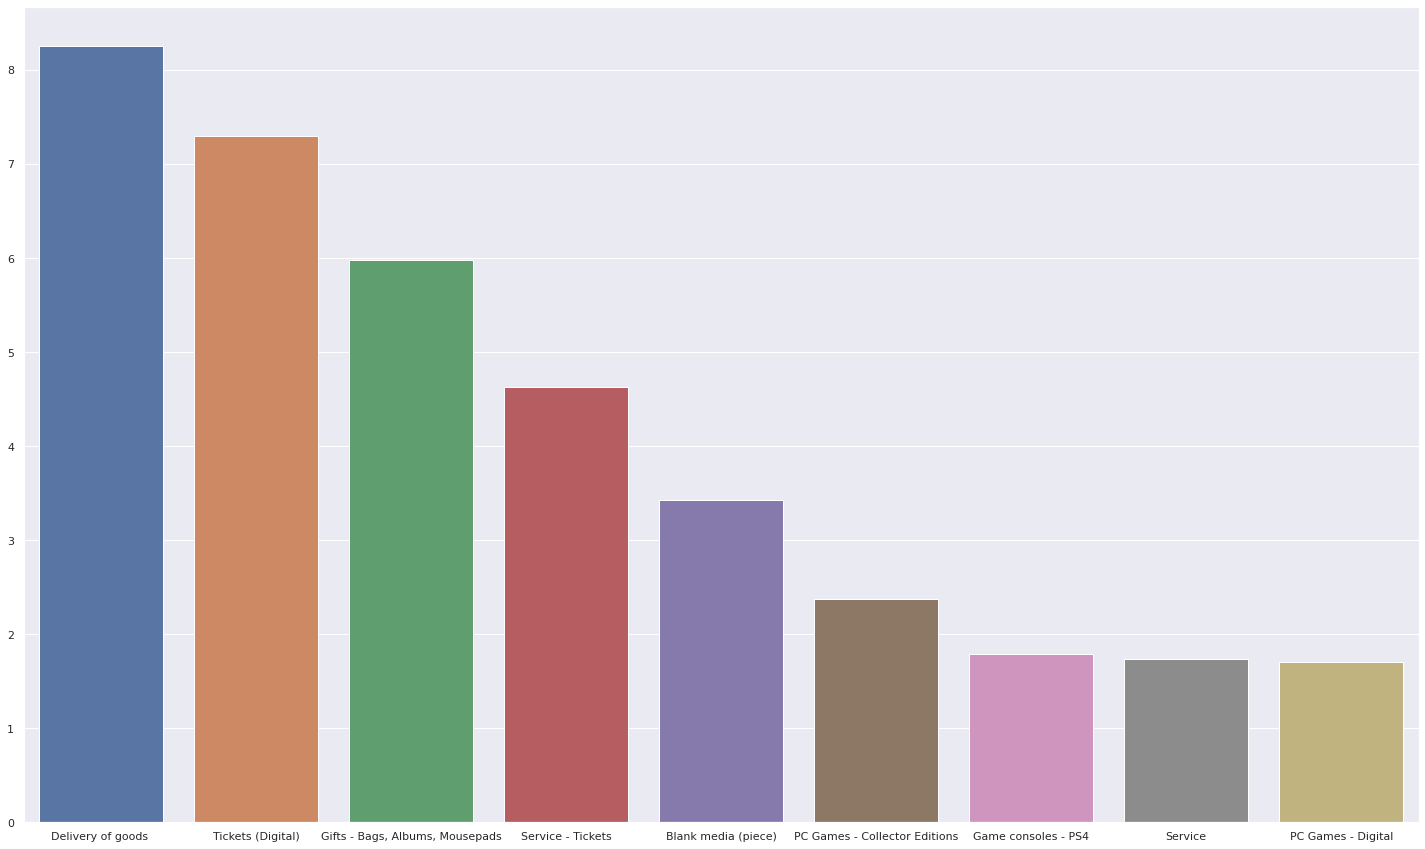

In [ ]:
# Set the figure size
plt.figure(figsize=(25, 15))
sns.set(font_scale=1)
keys = list(my_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(my_dict[k][:-1]) for k in keys]
sns.barplot(x=keys, y=vals)




## **2013**

In [ ]:
mean_products_item_sold_2013  = product_sales_2013.groupby('item_category_name').item_cnt_day.mean()
print(mean_products_item_sold_2013)

item_category_name
 Accessories - PS2                        1.000
 Accessories - PS3                        1.082
 Accessories - PS4                        1.419
 Accessories - PSP                        1.051
 Accessories - PSVita                     1.033
                                           ... 
 Programs - Educational (Digit)           1.184
 Programs - For home and office           1.134
 Programs - For home and office (Digit)   1.762
 Service                                  1.446
PC - Headsets / Headphones                1.000
Name: item_cnt_day, Length: 70, dtype: float64


In [ ]:
#Show top 10
mean_products_item_sold_2013.sort_values(ascending=False).head(10)

item_category_name
 Gifts - Bags, Albums, Mousepads          7.185
 Game consoles - PS4                      5.499
 Delivery of goods                        4.766
 Blank media (piece)                      2.356
 PC Games - Collector's Editions          1.888
 Games - PS4                              1.823
 Programs - For home and office (Digit)   1.762
 Batteries                                1.755
 Gifts - Board games (compact)            1.457
 Service                                  1.446
Name: item_cnt_day, dtype: float64

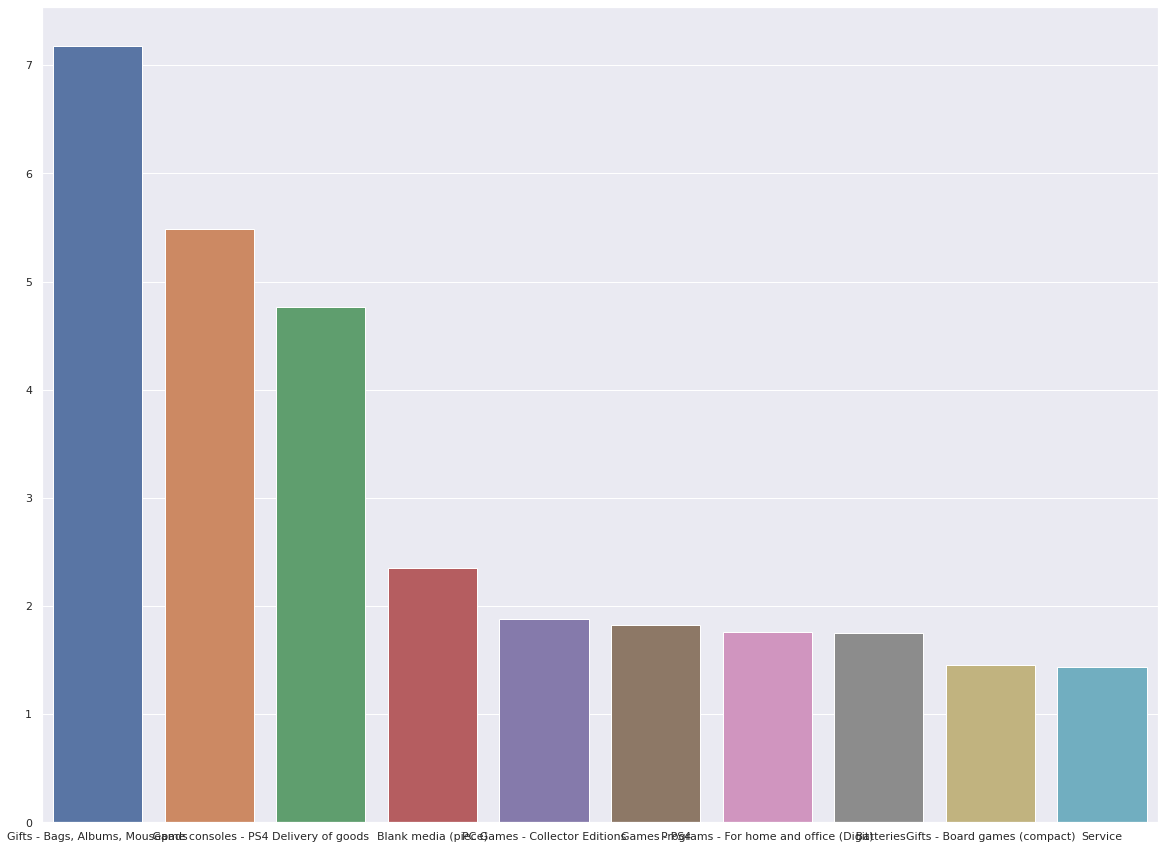

In [ ]:
#Define a dictionary for values in barplot
my_dict_2013 = {'Gifts - Bags, Albums, Mousepads': '7.185', ' Game consoles - PS4': ' 5.499', 'Delivery of goods': '4.766',
           'Blank media (piece)': '2.356','PC Games - Collector Editions': '1.888','Games - PS4': '1.823',
           'Programs - For home and office (Digit)': '1.762',' Batteries':'1.755','Gifts - Board games (compact)':'1.457','Service':'1.446'}

# Set the figure size
plt.figure(figsize=(20, 15))
sns.set(font_scale=1)
keys = list(my_dict_2013.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(my_dict_2013[k][:-1]) for k in keys]
sns.barplot(x=keys, y=vals)

# **2014**

In [ ]:
mean_products_item_sold_2014  = product_sales_2014.groupby('item_category_name').item_cnt_day.mean()
print(mean_products_item_sold_2014)

item_category_name
 Accessories - PS3                        1.050
 Accessories - PS4                        1.150
 Accessories - PSP                        1.049
 Accessories - PSVita                     1.020
 Accessories - XBOX 360                   1.101
                                           ... 
 Programs - For home and office           1.138
 Programs - For home and office (Digit)   1.449
 Programs - MAC (Digit)                   1.059
 Service                                  1.900
 Tickets (Digital)                        5.556
Name: item_cnt_day, Length: 73, dtype: float64


In [ ]:
#Show top 10
mean_products_item_sold_2014.sort_values(ascending=False).head(10)

item_category_name
 Delivery of goods                      8.890
 Gifts - Bags, Albums, Mousepads        6.022
 Tickets (Digital)                      5.556
 Payment Cards - Live! (Digital)        4.022
 Blank media (piece)                    2.587
 Service                                1.900
 PC Games - Collector's Editions        1.823
 Games - PS4                            1.685
 PC Games - Digital                     1.650
 Payment Cards (Cinema, Music, Games)   1.649
Name: item_cnt_day, dtype: float64

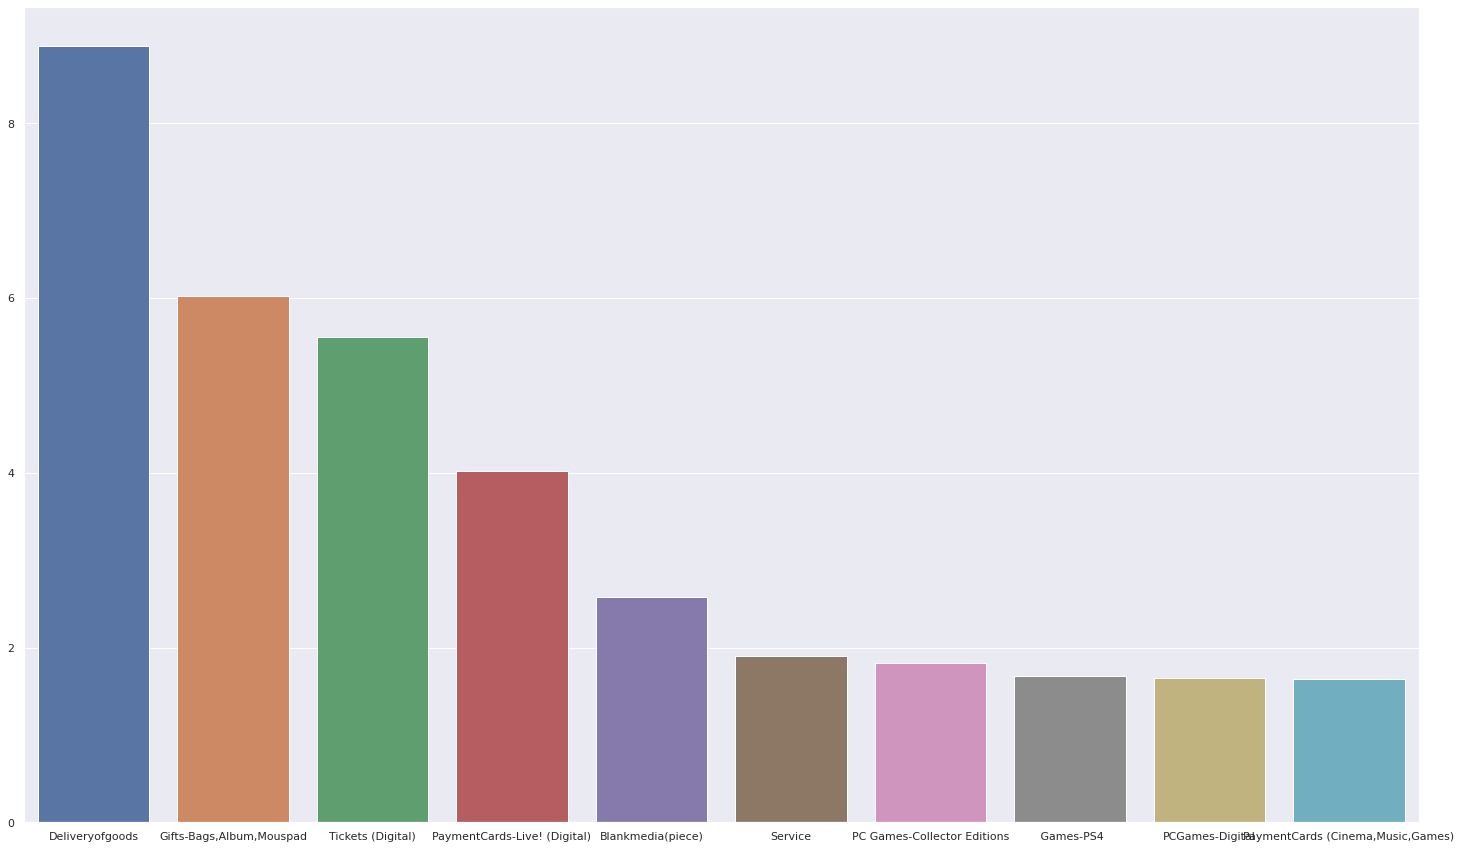

In [ ]:
#Define a dictionary for values in barplot
my_dict_2014 = {'Deliveryofgoods': '8.890', 'Gifts-Bags,Album,Mouspad': '  6.022', 'Tickets (Digital)': '5.556',
           'PaymentCards-Live! (Digital)': '4.022','Blankmedia(piece)': '2.587','Service': '1.900',
           'PC Games-Collector Editions': '1.823',' Games-PS4':'1.685','PCGames-Digital':'1.650','PaymentCards (Cinema,Music,Games)':'1.649'}

# Set the figure size
plt.figure(figsize=(25, 15))
sns.set(font_scale=1)
keys = list(my_dict_2014.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(my_dict_2014[k][:-1]) for k in keys]
sns.barplot(x=keys, y=vals)

## **2015**

In [ ]:
mean_products_item_sold_2015  = product_sales_2015.groupby('item_category_name').item_cnt_day.mean()


In [ ]:
#Show top 10
mean_products_item_sold_2015.sort_values(ascending=False).head(10)

item_category_name
 Blank media (piece)               50.000
 Tickets (Digital)                 12.012
 Delivery of goods                 10.071
 Gifts - Bags, Albums, Mousepads    4.654
 Service - Tickets                  4.632
 Payment Cards - Live! (Digital)    3.138
 PC Games - Digital                 2.009
 PC Games - Collector's Editions    1.720
 Service                            1.664
 Batteries                          1.595
Name: item_cnt_day, dtype: float64

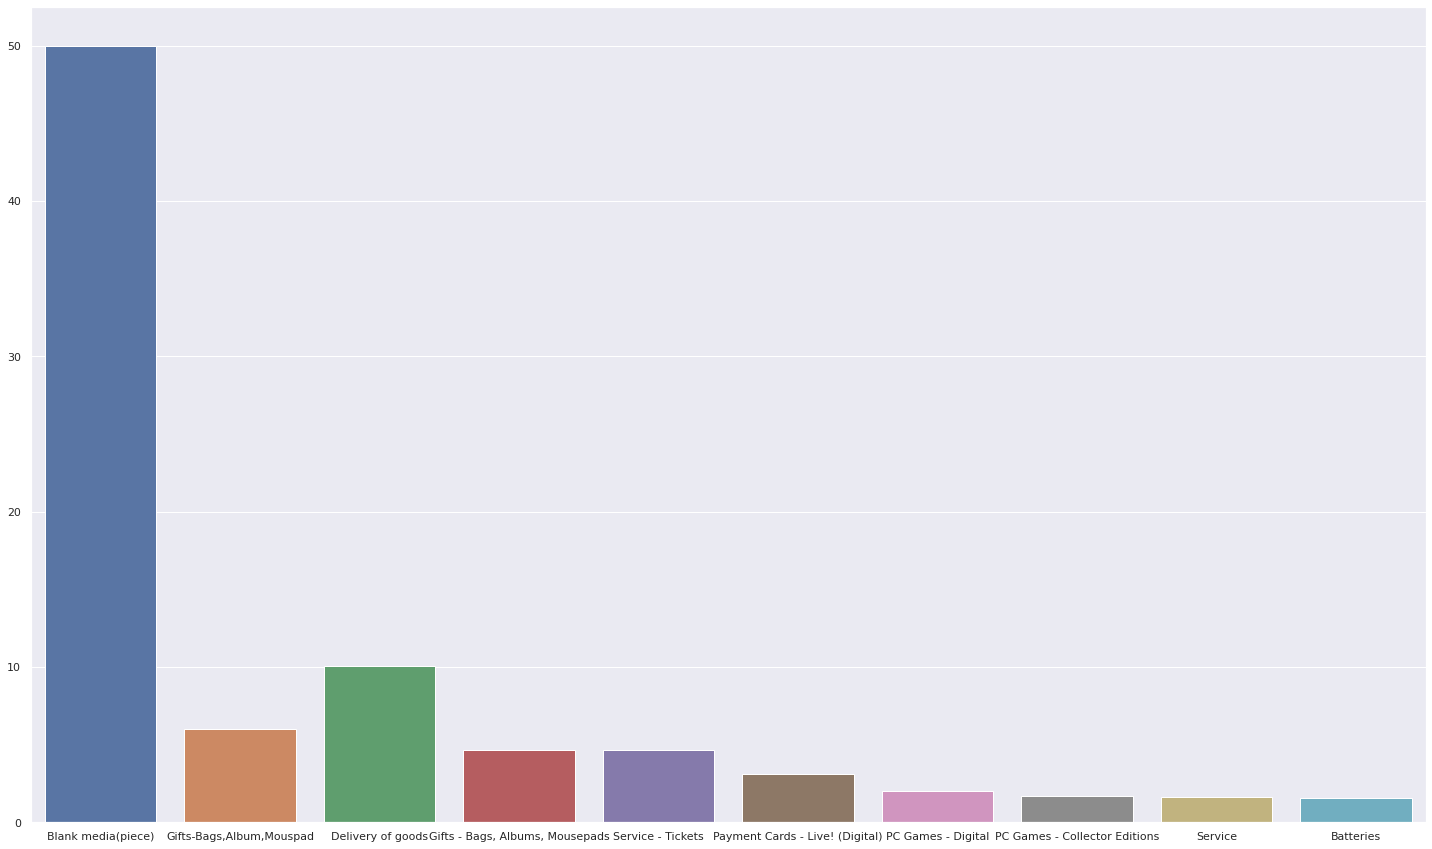

In [ ]:
#Define a dictionary for values in barplot
my_dict_2015 = {'Blank media(piece)': '50.000', 'Gifts-Bags,Album,Mouspad': ' 6.022','Delivery of goods':'10.071','Gifts - Bags, Albums, Mousepads':'4.654','Service - Tickets':'4.632',
                'Payment Cards - Live! (Digital)':'3.138','PC Games - Digital':'2.009','PC Games - Collector Editions':'1.720','Service':'1.664','Batteries':'1.595'}

# Set the figure size
plt.figure(figsize=(25, 15))
sns.set(font_scale=1)
keys = list(my_dict_2015.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(my_dict_2015[k][:-1]) for k in keys]
sns.barplot(x=keys, y=vals)

# **¿Qué tiendas venden más de media En general?¿Y por año?**

**GENERAL**

In [ ]:
mean_shop_id_sold_general  = product_sales.groupby('shop_id').item_cnt_day.mean()



In [ ]:
#Show top 10
mean_shop_id_sold_general.sort_values(ascending=False).head(10)

shop_id
9    4.232
20   3.277
12   2.133
55   1.823
42   1.329
22   1.328
31   1.321
25   1.302
28   1.299
27   1.298
Name: item_cnt_day, dtype: float64

| SHOP ID   | Items Sold General| 
| :-: | :-: |
|**9** |           **4.232**|
|**20** |       **3.277**|
|**12** |  **2.133**|
|**55** |  **1.823**|
|**42** |  **1.329**|
|**22**  | **1.328**|
|**31**|   **1.321**|
|**25** |  **1.302**|
|**28** |  **1.299**|
|**27** |  **1.298**|

# **2013**

In [ ]:
mean_shop_id_sold_2013  = product_sales_2013.groupby('shop_id').item_cnt_day.mean()


In [ ]:
#Show top 10
mean_shop_id_sold_2013.sort_values(ascending=False).head(10)

shop_id
9    4.389
12   1.730
22   1.350
31   1.341
28   1.316
42   1.309
25   1.306
54   1.303
43   1.295
55   1.279
Name: item_cnt_day, dtype: float64

| SHOP ID   | Items Sold 2013| 
| :-: | :-: |
|**9** |  **4.389**|
|**12** |  **1.730**|
|**22** |  **1.350**|
|**31**  | **1.341**|
|**28**  | **1.316**|
|**42**  |**1.309**|
|**25**  | **1.306**|
|**54**  | **1.303**|
|**43**  | **1.295**|
|**55**   |**1.279**|

## **2014**

In [ ]:
mean_shop_id_sold_2014  = product_sales_2014.groupby('shop_id').item_cnt_day.mean()
#Show top 10
mean_shop_id_sold_2014.sort_values(ascending=False).head(10)

shop_id
9    4.344
20   3.452
12   2.129
55   1.635
27   1.345
31   1.328
22   1.321
42   1.320
54   1.318
28   1.316
Name: item_cnt_day, dtype: float64

| SHOP ID   | Items Sold 2014| 
| :-: | :-: |
|**9** |   **4.344**|
|**20** |  **3.452**|
|**12** |  **2.129**|
|**55** |  **1.635**|
|**27**|   **1.345**|
|**31** |  **1.328**|
|**22** |  **1.321**|
|**42** | **1.320**|
|**54** |  **1.318**|
|**28**|   **1.316**|

# **2015**

In [ ]:
mean_shop_id_sold_2014  = product_sales_2014.groupby('shop_id').item_cnt_day.mean()
#Show top 10
mean_shop_id_sold_2014.sort_values(ascending=False).head(10)

shop_id
9    4.344
20   3.452
12   2.129
55   1.635
27   1.345
31   1.328
22   1.321
42   1.320
54   1.318
28   1.316
Name: item_cnt_day, dtype: float64

| SHOP ID   | Items Sold 2015| 
| :-: | :-: |
|**9**|   **4.344**|
|**20** |  **3.452**|
|**12** |  **2.129**|
|**55** |  **1.635**|
|**27** |  **1.345**|
|**31** |  **1.328**|
|**22** |  **1.321**|
|**42** |  **1.320**|
|**54**|   **1.318**|
|**28**|   **1.316**|